<font color='DarkBlue' size=+2><b>Комментарий ревьюера</b></font><br>
<font color='DarkBlue'>Привет, Евгения! <br>Меня зовут Олег Мазуренко, и я буду проверять этот проект. Спасибо за проделанную работу! <br>Ко мне можно обращаться на «ты». Как мне обращаться, напиши.</font><br>
<font color='DarkBlue'>Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</font><br>
<font color='DarkBlue'>Синий текст &mdash; просто текст комментария.</font><br>
<font color='DarkGreen'>👌 Зеленый текст &mdash; все отлично.</font><br>
<font color='DarkMagenta'>👉 Фиолетовый текст &mdash; сделано все правильно, однако есть рекомендации, на что стоит обратить внимание. Реализованные рекомендации позволят нам наработать опыт решения задачи разными способами или посмотреть на задачу под иным углом.</font><br>
<font color='Red'>🛠 Красный текст &mdash; есть недочеты, они иногда бывают. </font><br><font color='DarkBlue'>Любая ошибка это возможность посмотреть на задачу с другой стороны и освоить новые знания, по этому не надо расстраиваться, если они есть.</font><br>
<font color='DarkBlue'>Обращаю внимание, что комментарии ревьюера после проверки удалять нельзя они помогают отследить логику исправления или изменения проекта. Это дополнительный навык при обучении. Свой исправляемый код лучше тоже не удалять, а ремить #, это позволит акцентировать изменения в ходе подготовки окончательного варианта проекта.<br>
Ответы на мои комментарии лучше тоже помечать. 
Например: </font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='DarkBlue'><b>Теперь посмотрим, что у нас получилось!</b></font>

# Исследование исторических данных о продажах игр  для интернет-магазина "Стримчик"

**Дано:** из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

**Цель:** выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании для интернет-магазина "Стримчик", который продает компьютерные игры по всему миру.


**Описание данных**

- ***Name*** — название игры;
- ***Platform*** — платформа;
- ***Year_of_Release*** — год выпуска;
- ***Genre*** — жанр игры;
- ***NA_sales*** — продажи в Северной Америке (миллионы проданных копий);
- ***EU_sales*** — продажи в Европе (миллионы проданных копий);
- ***JP_sales*** — продажи в Японии (миллионы проданных копий);
- ***Other_sales*** — продажи в других странах (миллионы проданных копий);
- ***Critic_Score*** — оценка критиков (максимум 100);
- ***User_Score*** — оценка пользователей (максимум 10);
- ***Rating*** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**План работы:**

- Шаг 1. Загрузка данных;
- Шаг 2. Предобработка данных;
- Шаг 3. Исследовательский анализ данных;
- Шаг 4. Составление портрета пользователя для каждого региона;
- Шаг 5. Проверка гипотез;
- Шаг 6. Общий вывод.

<font color='DarkBlue'><b>Комментарий ревьюера 0</b></font><br>
<font color='DarkGreen'>👌 Хорошо, сделано описание проекта. 👍</font>

## Шаг 1. Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from math import factorial
from math import sqrt
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


***Нужно сменить регистр у названий столбцов.*** 

***Есть пропуски в столбцах Critic_Score, User_Score, Rating.***

***Нужно поменять тип данных в User_Score на float64.***

<font color='DarkBlue'><b>Комментарий ревьюера 0</b></font><br>
<font color='DarkGreen'>👌 Хорошо, изучили данные для предобработки.</font>

## Шаг 2. Предобработка данных

### Замена названий столбцов

In [5]:
data = data.rename(columns={'Name': 'name', 'Platform': 'platform', 'Year_of_Release': 'year_of_release', 'Genre': 'genre', 'NA_sales': 'na_sales', 'EU_sales': 'eu_sales', 'JP_sales': 'jp_sales', 'Other_sales': 'other_sales', 'Critic_Score': 'critic_score', 'User_Score': 'user_score', 'Rating': 'rating'  }) 
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<font color='DarkBlue'><b>Комментарий ревьюера 0</b></font><br>
<font color='DarkGreen'>👌 Хорошо! Приводим названия колонок к общепринятому стилю. 😉 <br>
А можно просто методом вот так:</font><br>
`df.columns = df.columns.str.lower()`

### Преобразование данных в нужные типы

***Меняем тип данных в user_score на float64, т.к. это числа с минимум 1 знаком после запятой.***

In [6]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [7]:
data['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
2.3       2
0.3       2
0.7       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

***При попытке смены типа данных в user_score вышла ошибка, которая указала на наличие не числовых значений в столбце. Это "tbd" - аббревиатура от английского To Be Determined (будет определено). Иными словами это фактическое отсутствие оценки. Я заменю "tbd" на "nan".***

In [8]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)
data['user_score'] = data['user_score'].astype(float)
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

<font color='DarkBlue'><b>Комментарий ревьюера 0</b></font><br>
<font color='DarkGreen'>👌 Правильно сделана замена "tbd" на NaN. Это практически аналог пропусков.</font>

### Обработка пропусков.


- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- Опишите причины, которые могли привести к пропускам;
- Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;

***2 пропущенных значения в столбце name. Удаляем, т.к. без названия игры все остальные данные не имеют значения.***

In [9]:
data = data.dropna(subset=['name']) 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


<font color='DarkBlue'><b>Комментарий ревьюера 0</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что удалили пропуски в названии игр, тем более в этих строках еще хватает пропусков по другим колонкам.</font>

***269 пропущенных значений в столбце year_of_release. Это 1% от всей базы данных, можем их удалить.*** 

In [10]:
data = data.dropna(subset=['year_of_release']) 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


<font color='DarkBlue'><b>Комментарий ревьюера 0</b></font><br>
<font color='DarkGreen'>👌 Правильное решение по удалению пропусков в годах релиза.</font>

***После удаления пропусков в столбце year_of_release мы можем поменять тип данных на int, т.к. год - целое число.***

In [11]:
data['year_of_release'] = data['year_of_release'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


<font color='DarkBlue'><b>Комментарий ревьюера 0</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что перевели тип данных по году выпуска игр. 👍</font>

***8477 пропущенных значений в столбце critic_score. Можно заполнить, если для одной и той же игры оценки повторяются. Если же они везде разные, то проще оставить как есть.***

***6 764 пропущенных значений в столбце rating. Можно заполнить, если для одной рейтинг повторяется. Если же они везде разные, то проще оставить как есть.***

In [12]:
data['name'].value_counts()

Need for Speed: Most Wanted               12
Ratatouille                                9
LEGO Marvel Super Heroes                   9
FIFA 14                                    9
The LEGO Movie Videogame                   8
                                          ..
Boxer's Road                               1
Top Gear RPM Tuning                        1
Donkey Kong Classics                       1
Marvel Super Heroes vs. Street Fighter     1
Smart Girl's Playhouse                     1
Name: name, Length: 11426, dtype: int64

In [13]:
data[data['name'] == 'Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


***Для Need for Speed: Most Wanted 2005 года critic_score в 2х вариантах - 45 и 82, rating - E и T. Вероятно данные с пропусками проще отрезать при необходимости анализа этих столбцов.***

***Проверим датасет на наличие полных дублей.***

In [14]:
data.duplicated().sum()

0

<font color='DarkBlue'><b>Комментарий ревьюера 0</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что проверены явные дубликаты, иногда они сильно искажают анализ.</font><br>
<font color='Red'>🛠 Но не произведена проверка неявных дубликатов и не принято решение по их обработке. Данная проверка является составной частью первичного анализа данных. Проверять следует по имени, платформе и году релиза  одновременно.</font>

</font><font color='Blue'><b>Комментарий студента 0</b></font><br>

***Дополнила, см. ниже:***

In [15]:
data[data.duplicated(['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


In [16]:
data.query('name == "Madden NFL 13" and platform == "PS3" and year_of_release == 2012')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [17]:
data = data.drop_duplicates(subset=['name','name', 'platform', 'year_of_release'], keep='first')
data[data.duplicated(['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


</font><font color='Blue'><b>Комментарий студента 0</b></font><br>

***Обнаружился один дубликат по трем параметрам. Строку решила удалить.***

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, теперь правильно.</font>

### Посчет суммарных продаж во всех регионах

In [18]:
data['sales_sum'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


<font color='DarkBlue'><b>Комментарий ревьюера 0</b></font><br>
<font color='Red'>🛠 Вот, что написано в задании: <br><b>
Опишите причины, которые могли привести к пропускам</b> <br>А это не сделано.</font><br>
<font color='Red'>🛠 Раздел предобработки данных должен заканчиваться выводами по проведенному анализу и обработке данных.</font>

</font><font color='Blue'><b>Комментарий студента 0</b></font><br>

***У столбцов name, genre и year_of_release данные могли случайным образом не попасть в выгрузку или просто не быть указаны в первоисточниках. Доля пропусков в этих столбцах меньше 2х процентов, поэтому строки с пропусками в этих графах можно удалять не опасаясь исказить выборку.***

***В столбцах critic_score и user_score доля пропусков существенна, около 50% и 35% соответственно. Пропуски могут относится к играм, которые были выпущены либо очень давно, когда никто не выставлял оценки играм, или наоборот слишком недавно и они еще не получили оценок от критиков и пользователей. Также могут быть платформы, которые в принципе не предполагают оценивание игр кем бы то ни было.***

***В столбце rating указывается рейтинг ESRB, который действует в США и Канаде. Игры с пропусками возможно не выходили на рынок Северной Америки и поэтому не получили рейтинг.***


***В столбцах critic_score, user_score и rating мы оставили пропуски как есть, т.к. достроить картину в данном случае невозможно.***

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Пропуски в отзывах могли появиться, потому что продажи игры были низкие и не набралось необходимого количества индивидуальных отзывов для получения итоговой оценки. <br>Анализ причин пропусков позволяет нам принять правильное решение по их обработке.</font>

<font color='DarkBlue'><b>Комментарий ревьюера 0</b></font><br>
<font color='DarkGreen'>👌 Молодец, не забыли создать колонку с общими продажами. 👍 <br> А можно использовать вот такой код:</font><br>
`= data.loc[:,['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)`

In [19]:
# Комментарий ревьюера 0
# Посмотрим, что осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
 11  sales_sum        16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

<font color='DarkBlue'><b>Комментарий ревьюера 0</b></font><br>
<font color='DarkMagenta'>👉 Я бы порекомендовал посмотреть в инете, что означает рейтинг ESRB. И пропуски в этой колонке не являются просто ошибкой заполнения данных, а несут определенную информацию. Что бы проанализировать ее, на пропуски следует поставить заглушку. Но может это мы сделаем позже? Ладно, будем смотреть дальше. </font>

<font color='DarkBlue'><b>Комментарий ревьюера 0: Глоссарий</b></font><br>
<font color='DarkGreen'>👌 В контексте анализа и предобработки датасета часто используютется термин: <b>Заглушка</b>. <br>Из словаря: "Заглушка — приспособление для закрывания отверстия наглухо." <br>В нашем контексте закрытие пропуска в датасете каким-то значением, совпадающим по типу с данными колонки таблицы. Как правило, для числовых данных заглушка должна быть вне диапазона значений колонки. При анализе по данной колонке заглушка или фильтруется, или включается в анализ, если сам пропуск не является ошибкой сбора данных и несет какой-то признак. <br>Частая ошибка, когда заглушке присваивается числовое значение, например `0`, а в данных колонки присутствуют символьные значения `'0'`, то при преобразовании к числовому типу произойдет слияние значимых данных таблицы и заглушки.</font>

In [20]:
data['critic_score'] = data['critic_score'].fillna(-1) 
data['user_score'] = data['user_score'].fillna(-1) 
data['rating'] = data['rating'].fillna('no_rating') 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  float64
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
 11  sales_sum        16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Если это заглушка в отзывах критиков, то лучше было поставить отрицательное число, а потом при анализе его фильтровать. Или оставить пропуск, только его потом фильтровать при необходимости. Не рекомендуется когда значение заглушки попадает в диапазон допустимых значений колонки с данными, в нашем случае это 0 - 100.</font></font>
<br><font color='Red'>🛠 Правильный подход к замене пропусков в отзывах пользователей заглушкой. Но ошибка заключается в том, что данное значение заглушки входит в диапазон значений колонки отзывов пользователей, что не допустимо, тем более значение '0' уже присутствует в колонке, не смотря, что оно только одно.</font><br>
<font color='DarkMagenta'>👉 Можно поставить отрицательное значение, например -1, и его фильтровать при анализе отзывов и тесте гипотез. Или пропуски не обрабатывать, тогда в анализе отзывов они мешать не будут, но надо будет фильтровать при тестировании гипотез.</font><br>
<font color='DarkMagenta'>👉 Не очень хорошо вставлять числовую заглушку в колонку рейтинга, когда данные в колонке строковые. Не корректно смешивать разные типы данных в одной колонке.</font>

</font><font color='Blue'><b>Комментарий студента 1</b></font><br>
***Заменила значения "заглушек".***

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Хорошо, исправили.</font>

## Шаг 3. Исследовательский анализ данных

### Количество выпускаемых игр в год

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

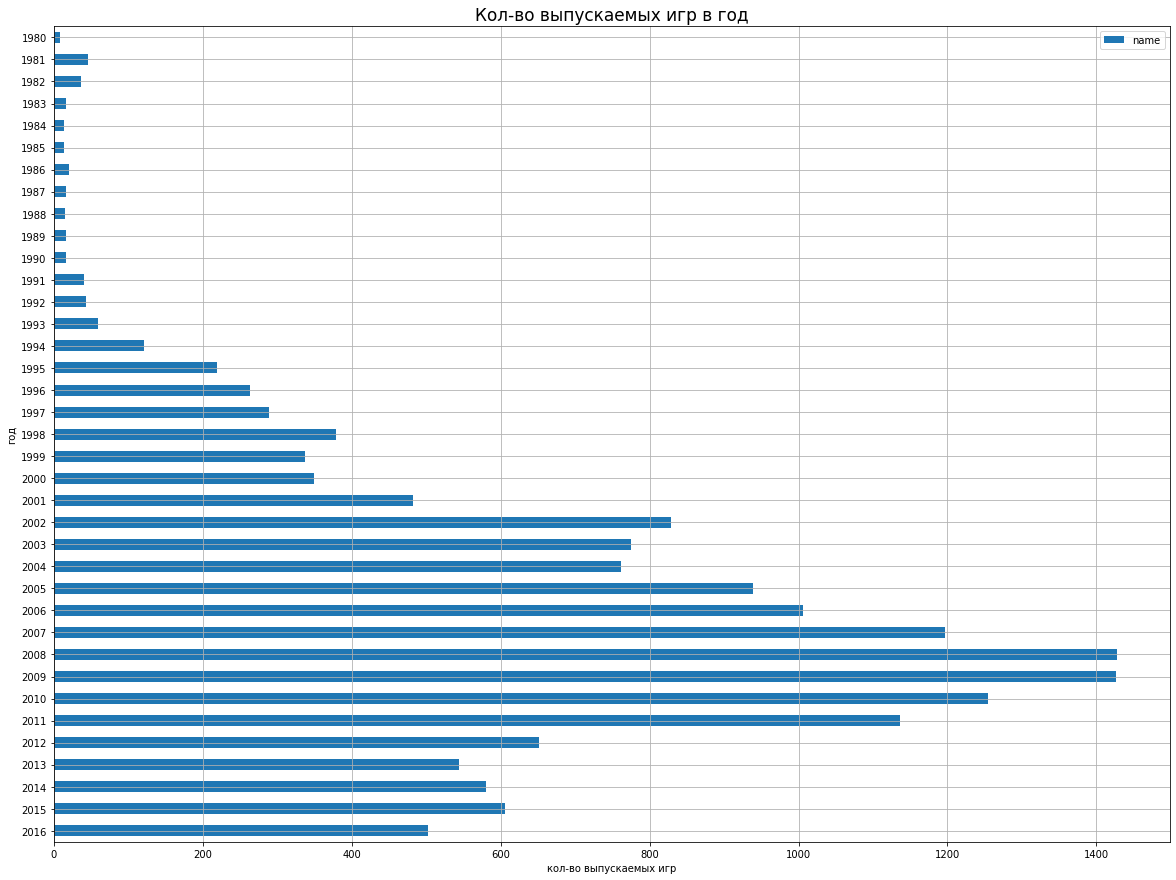

In [21]:
(
    data.pivot_table(index='year_of_release', values='name', aggfunc='count')
    .sort_values(by='year_of_release', ascending=False)
    .plot(kind='barh', grid=True, figsize=(20, 15))
) 

plt.xlabel('кол-во выпускаемых игр')
plt.ylabel('год')
plt.title('Кол-во выпускаемых игр в год', size=17)

plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера 0</b></font><br>
<font color='DarkGreen'>👌 Хорошая визуализация и правильно, что оси подписаны и есть название графика.</font>

***В базе данных собрана информация об играх, которые выпускались с 1980 по 2016 годы.
Для планирования кампании 2017 года следует ориентироваться на ближайший к нему период, например на постедние 3 года продаж: 2014-2016 гг.***

### Рейтинг платформ по суммарным продажам

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

***Построим рейтинг платформ по суммарным продажам.***

In [22]:
top_sales = data.pivot_table(index=['platform'], values=['sales_sum'], aggfunc=['sum']).reset_index()
top_sales.columns = ['platform', 'sales_sum']
top_sales = top_sales.sort_values(by='sales_sum', ascending=False)
top_sales

,platform,sales_sum
16,PS2,1233.56
28,X360,961.24
17,PS3,931.33
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


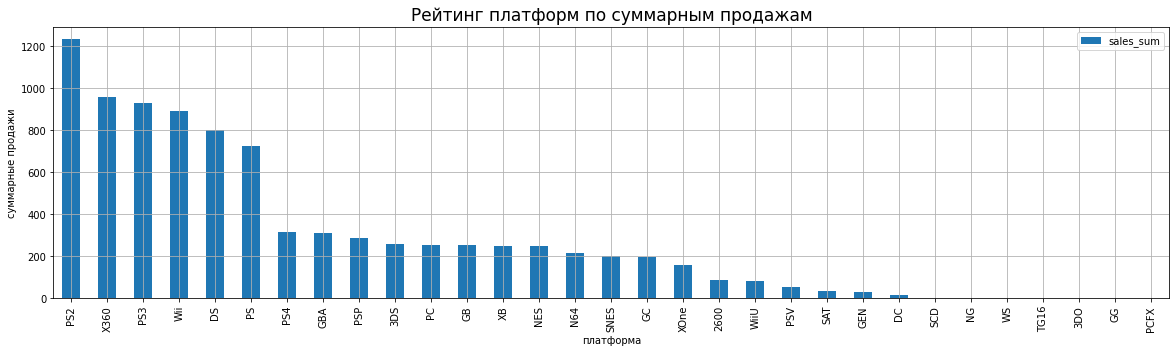

In [23]:
top_sales.plot(kind='bar', x='platform', grid=True, figsize=(20, 5))

plt.xlabel('платформа')
plt.ylabel('суммарные продажи')
plt.title('Рейтинг платформ по суммарным продажам', size=17)

plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера 0</b></font><br>
<font color='Red'>🛠 Это не суммарные продажи, это количество игр.</font>
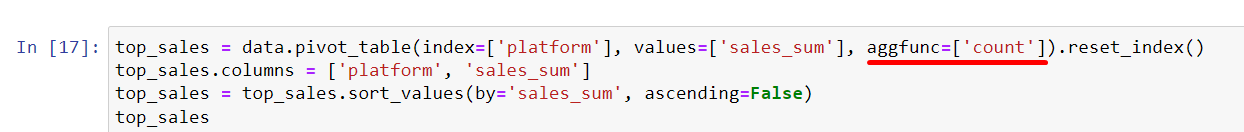<br>
<font color='DarkMagenta'>👉 А продажи вот так выгдядят:</font>
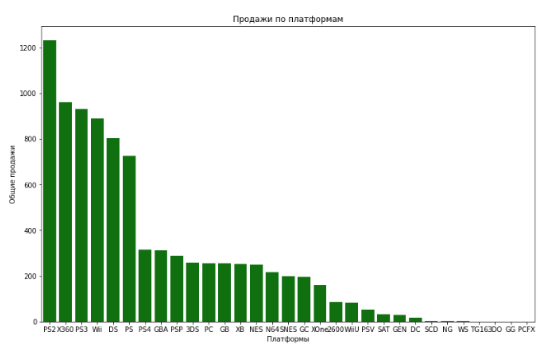

</font><font color='Blue'><b>Комментарий студента 0</b></font><br>

***Вот тут действительно осечка вышла, исправила.***

### Топ-6 платформ по объему продаж

***Для построения распределения суммарных продаж по годам возьмем топ-6 платформ.***

In [24]:
top_platform = data.query('platform in ["PS2", "DS", "PS3", "Wii","X360", "PS"]').pivot_table(index='year_of_release', columns = 'platform', values=['sales_sum'], aggfunc=['sum']).reset_index()
top_platform.columns = ['year_of_release', 'DS', 'PS', 'PS2', 'PS3', 'Wii', 'X360']
top_platform = top_platform.query('year_of_release > 1985')
top_platform

,year_of_release,DS,PS,PS2,PS3,Wii,X360
1,1994,NaN,6.03,NaN,NaN,NaN,NaN
2,1995,NaN,35.96,NaN,NaN,NaN,NaN
3,1996,NaN,94.70,NaN,NaN,NaN,NaN
4,1997,NaN,136.17,NaN,NaN,NaN,NaN
5,1998,NaN,169.49,NaN,NaN,NaN,NaN
6,1999,NaN,144.53,NaN,NaN,NaN,NaN
7,2000,NaN,96.37,39.17,NaN,NaN,NaN
8,2001,NaN,35.59,166.43,NaN,NaN,NaN
9,2002,NaN,6.67,205.38,NaN,NaN,NaN
10,2003,NaN,2.07,184.31,NaN,NaN,NaN


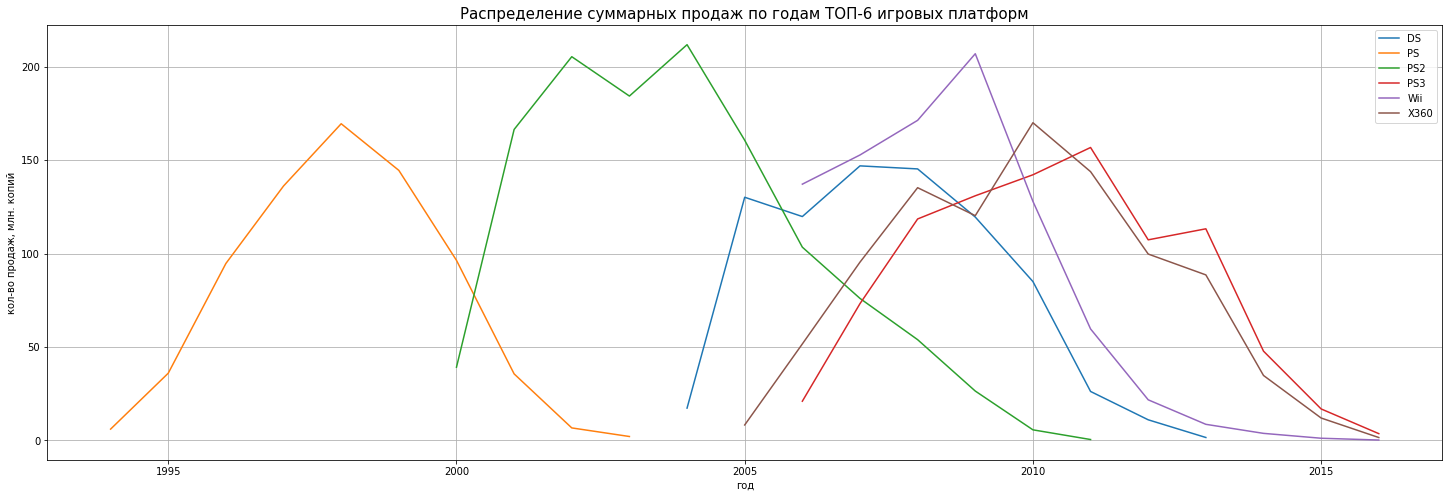

In [25]:
top_platform.plot(x='year_of_release', y=['DS', 'PS', 'PS2', 'PS3', 'Wii', 'X360'], grid=True, figsize=(25, 8))

plt.ylabel("кол-во продаж, млн. копий")
plt.xlabel("год")
plt.title('Распределение суммарных продаж по годам ТОП-6 игровых платформ', size=15)
plt.legend()
plt.show()

***У каждой платформы есть старт, пик и спад продаж. Это связано с техническим прогрессом, благодаря которому становится возможно делать более интересные и ресурсоемкие игры. В какой-то момент требования игр начинают превосходить возможности старой платформы и пользователи переходят на новую. На этот процесс, судя по нашим данным, уходит от 9 до 11 лет.***

***Еще одно наблюдение касается конкуренции на рынке игровых платформ. 
В 1994 году была 1 лидирующая по продажам платформа - PS, в 2010 количество лидеров рынка выросло до 6, а к 2016 снизилось до 3.
Учитывая уровень продаж на платформе Wii, в 2017 году останется 2 самые популярные платформы - PS3 и X360.***

<font color='DarkBlue'><b>Комментарий ревьюера 0</b></font><br>
<font color='DarkMagenta'>👉 Как-то не корректно определять срок жизни платформы "на глазок", его расчет из данных таблицы был бы более уместен, например, как показано ниже. Вопрос брать ли платформы всего датасета, или ограничивать периодом начала роста продаж, остается открытым, но можно поэкспериментировать.</font>

In [26]:
# Комментарий ревьюера 0
temp = data.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

In [27]:
time_life

,platform,min,max,life
,,year_of_release,year_of_release,
0,2600,1980,1989,10
1,3DO,1994,1995,2
2,3DS,2011,2016,6
3,DC,1998,2008,11
4,DS,1985,2013,29
5,GB,1988,2001,14
6,GBA,2000,2007,8
7,GC,2001,2007,7
8,GEN,1990,1994,5


</font><font color='Blue'><b>Комментарий студента 0</b></font><br>

***За код благодарю. Наверное, было бы полезно дать информацию о среднем сроке жизни платформы в таком виде:***

- минимальный срок жизни платформы - 1 год;
- максмиальный срок жизни - 32 года;
- медианное значение для всей выборки - 7 лет;
- средний срок жизни самых популярных платформ-лидеров по продажам - 10 лет.


### Топ-5 платформ по объему продаж за 2014-2016 гг.

Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.
Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [28]:
current_data = data.query('year_of_release > 2013').pivot_table(index='year_of_release', columns = 'platform', values=['sales_sum'], aggfunc=['sum']).reset_index()
current_data.columns = ['year_of_release', '3DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']
current_data

,year_of_release,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
0,2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
1,2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2,2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


<font color='DarkBlue'><b>Комментарий ревьюера 0</b></font><br>
<font color='DarkGreen'>👌 Правильно выбран актуальный период. 👍 Сейчас в наше динамичное время в бизнесе уже используются для прогноза периоды в 2-3 года.</font>

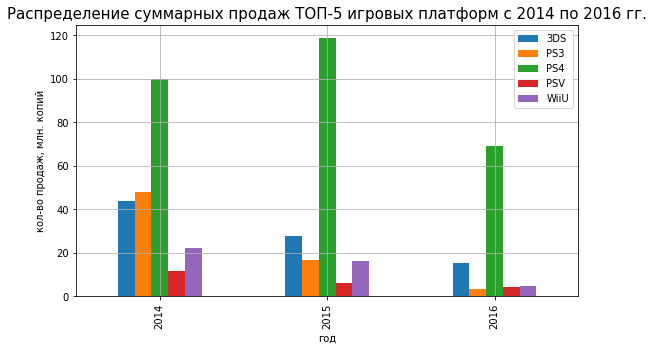

In [29]:
current_data.plot(kind='bar', x='year_of_release', y=['3DS', 'PS3', 'PS4', 'PSV', 'WiiU'], grid=True, figsize=(9, 5))

plt.ylabel("кол-во продаж, млн. копий")
plt.xlabel("год")
plt.title('Распределение суммарных продаж ТОП-5 игровых платформ с 2014 по 2016 гг.', size=15)
plt.legend()
plt.show()

***Нами были выбраны 5 платформ - лидеров по продажам игр: 3DS, PS3, PS4, PSV, WiiU.***

***За период с 2014 по 2016 гг. продажи в каждой из них шли на спад.***

***С точки зрения перспектив 2017 года потенциально прибыльной выглядит PS4. По сравнению с конкурентами продажи на ней выглядят высокими в 2016 г., несмотря на спад.***

### Диаграмма размаха по продажам игр за 2014 - 2016 гг.

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [30]:
good_data = data.query('year_of_release > 2013')
good_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     1689 non-null   float64
 9   user_score       1689 non-null   float64
 10  rating           1689 non-null   object 
 11  sales_sum        1689 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 171.5+ KB


<font color='DarkBlue'><b>Комментарий ревьюера 0</b></font><br>
<font color='Red'>🛠 На основании чего сокращается более 58% строк датасета и более 38% общих продаж? См.код ниже. Вынужден прервать ревью, так как дальнейший анализ не валиден.</font>

</font><font color='Blue'><b>Комментарий студента 0</b></font><br>
***Вернула данные.***

In [31]:
# Комментарий ревьюера 0
temp1, temp2 = len(good_data), len(data.query('year_of_release > 2013'))
print("Сокращение строк датасета", temp1, temp2, round((temp2-temp1)/temp2*100, 2))
temp1, temp2 = good_data.sales_sum.sum(), data.query('year_of_release > 2013').sales_sum.sum()
print("Сокращение общих продаж  ",temp1, temp2, round((temp2-temp1)/temp2*100, 2))

Сокращение строк датасета 1689 1689 0.0
Сокращение общих продаж   729.45 729.45 0.0


In [32]:
global_sales = good_data.loc[:,['platform', 'sales_sum']]
global_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   platform   1689 non-null   object 
 1   sales_sum  1689 non-null   float64
dtypes: float64(1), object(1)
memory usage: 39.6+ KB


In [33]:
grouped = global_sales.groupby(['platform']).median().sort_values(by='sales_sum')
grouped

,sales_sum
platform,
PSP,0.020
PSV,0.040
PC,0.060
3DS,0.090
PS3,0.110
Wii,0.180
X360,0.180
PS4,0.185
WiiU,0.190


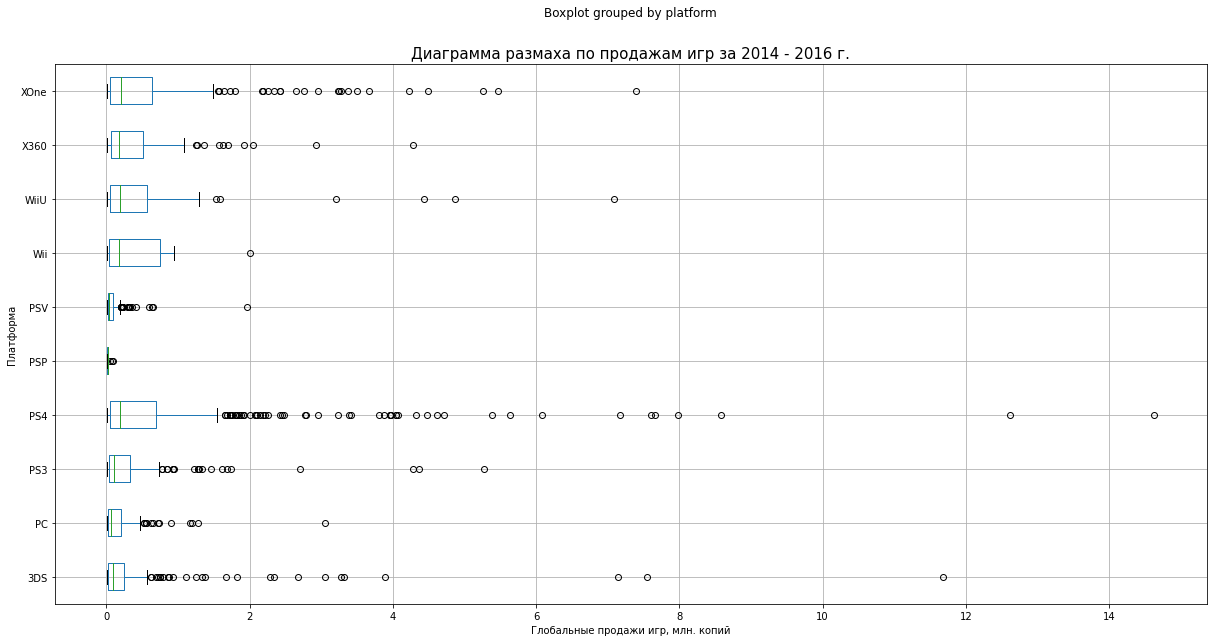

In [34]:
global_sales.boxplot(column = 'sales_sum', by = 'platform', figsize = (20,10), vert = False)
plt.ylabel("Платформа")
plt.xlabel("Глобальные продажи игр, млн. копий")
plt.title('Диаграмма размаха по продажам игр за 2014 - 2016 г.', size=15)

plt.show()

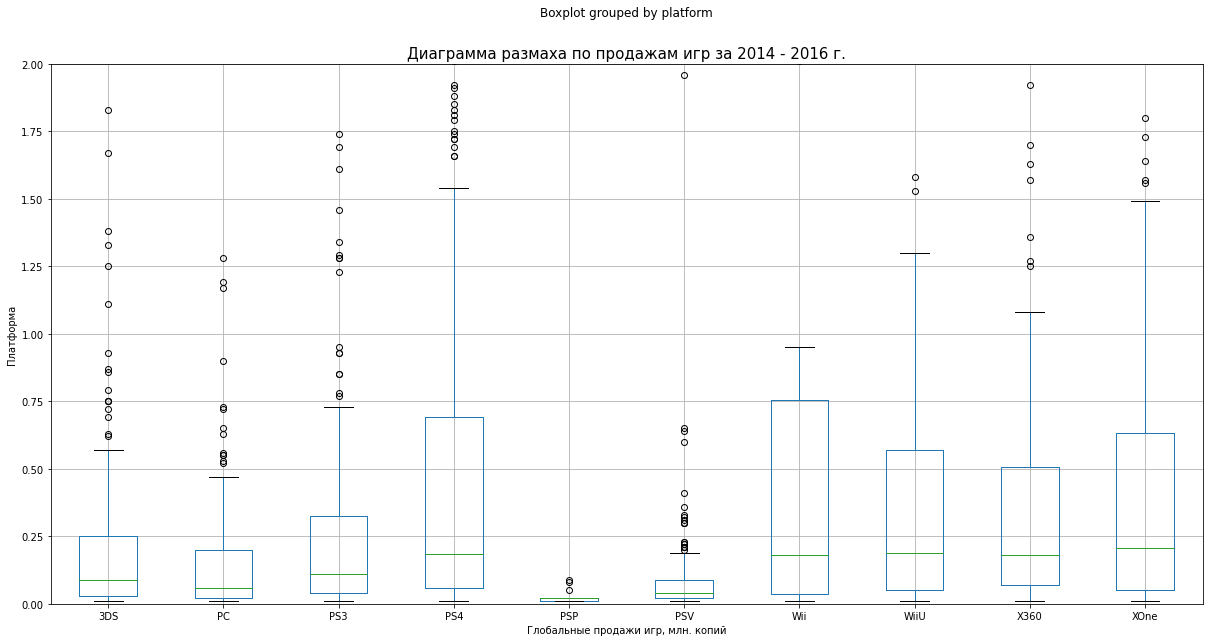

In [35]:
global_sales.boxplot(column = 'sales_sum', by = 'platform', figsize = (20,10))
plt.ylim(0, 2)
plt.ylabel("Платформа")
plt.xlabel("Глобальные продажи игр, млн. копий")
plt.title('Диаграмма размаха по продажам игр за 2014 - 2016 г.', size=15)

plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 К сожалению, на диаграмме размаха видны только выбросы, и совсем не видны медиана и 75% квантиль. Для более обоснованных выводов нужно сделать дополнительный график, где будет отображена только крупная часть boxplot-ов. Этого можно добиться, задав параметр хlim(). Примерно вот так, для вертикального размещения бокплотов:</font>
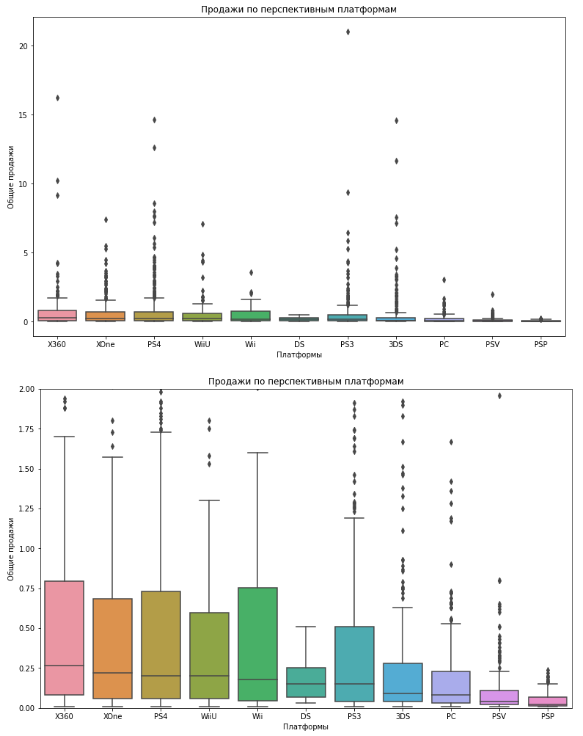

</font><font color='Blue'><b>Комментарий студента 1 </b></font><br>
***Построила выше диаграмму размаха в приближенном масштабе.
Дополнила выводы.***

***Мы получили диаграммы размаха для 10 платформ по данным за 3 года продаж.***

***Наиболее широкий диапазон нормальных значений у платформ XOne и PS4 - от 0 до 1,5 млн.***

***У всех платформ, кроме PSP есть значения, превышающие нормальные, т.е. выбросы. Наибольшее кол-во у платформ PS4 (max ~ 15 млн.), XOne (max ~ 7 млн.) и 3DS (max ~ 11,5 млн.). Такие рекордные продажи могут быть результатом успешных рекламных кампаний.***

***Самые высокие медианные значения по глобальным продажам у платформ PS4, Wii, WiiU, X360 и Xone.***

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 Для интерпретации диаграмм размаха помогает вспомнить, что означают боксплоты. В данном случае расположение боксплота и медианы показывают у какой платформы стабильно высокие продажи. Соответственно, Стримчик должен ориентироваться на такие платформы, так как какая игра в 2017 году выстрелит не известно.</font>
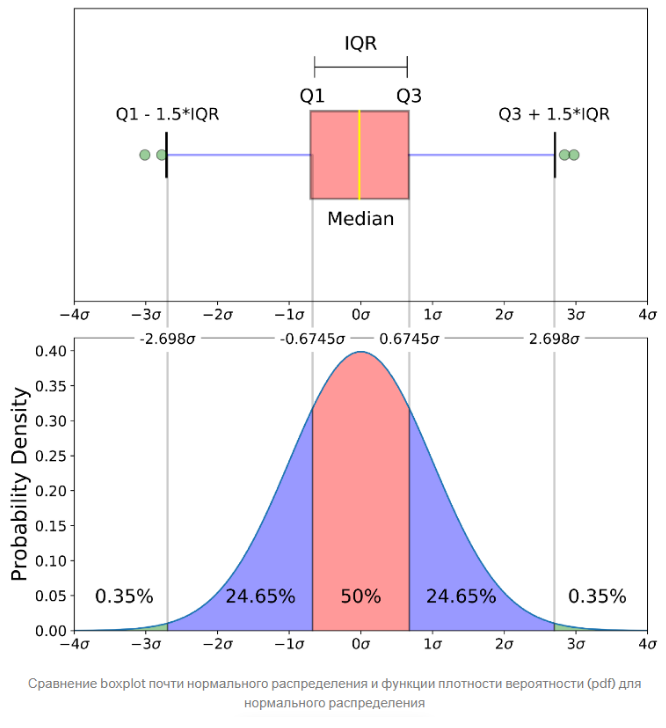

### Влияние отзывов пользователей и критиков на продажи внутри одной платформы

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
Соотнесите выводы с продажами игр на других платформах.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 В задании написано: <br><b>Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. <br>Не учитывайте в работе данные за предыдущие годы.</b> <br>После определения актуального периода дальнейший анализ должен проводиться только за этот период. Следует создать датасет с данными за актуальный период и далее проводить анализ только его.</font>

</font><font color='Blue'><b>Комментарий студента 1 </b></font><br>
***Выделила данные за актуальный период ниже.***

In [36]:
# Комментарий ревьюера
data.year_of_release.min()

1980

In [37]:
current_data = data.query('year_of_release > 2013')
current_data.year_of_release.min()

2014

In [38]:
current_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     1689 non-null   float64
 9   user_score       1689 non-null   float64
 10  rating           1689 non-null   object 
 11  sales_sum        1689 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 171.5+ KB


#### Сравнение влияния отзывов пользователей и критиков на продажи на платформе PS4 с влиянием на продажи на других платформах (в сумме)

In [39]:
PS4_sales_critic = current_data.query('platform == "PS4" and critic_score != -1')

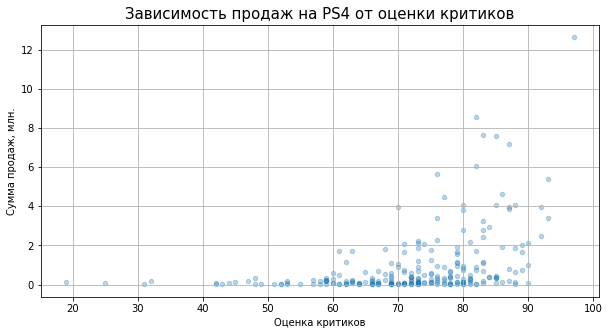

In [40]:
PS4_sales_critic.plot(x='critic_score', y='sales_sum', kind='scatter', alpha=0.3, figsize=(10, 5), grid=True)

plt.ylabel("Сумма продаж, млн.")
plt.xlabel("Оценка критиков")
plt.title('Зависимость продаж на PS4 от оценки критиков', size=15)

plt.show()

In [41]:
PS4_sales_critic['sales_sum'].corr(PS4_sales_critic['critic_score'])

0.40266141068104083

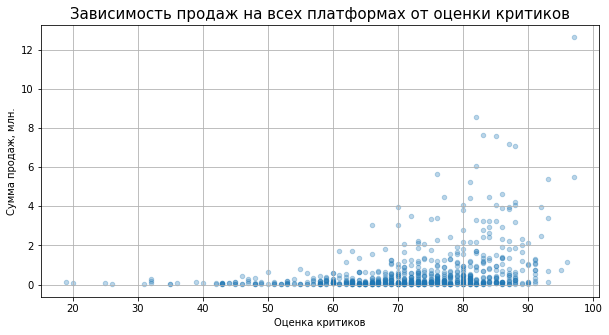

In [42]:
current_data_critic = current_data.query('critic_score != -1')
current_data_critic.plot(x='critic_score', y='sales_sum', kind='scatter', alpha=0.3, figsize=(10, 5), grid=True)

plt.ylabel("Сумма продаж, млн.")
plt.xlabel("Оценка критиков")
plt.title('Зависимость продаж на всех платформах от оценки критиков', size=15)

plt.show()

In [43]:
current_data_critic['sales_sum'].corr(current_data_critic['critic_score'])

0.328105086966363

***Корреляция между оценкой критиков и уровнем продаж для платформы PS4 существует, но не слишком сильная. Тем не менее она немного выше, чем у других платформ.***

In [44]:
PS4_sales_user = current_data.query('platform == "PS4" and user_score != -1')

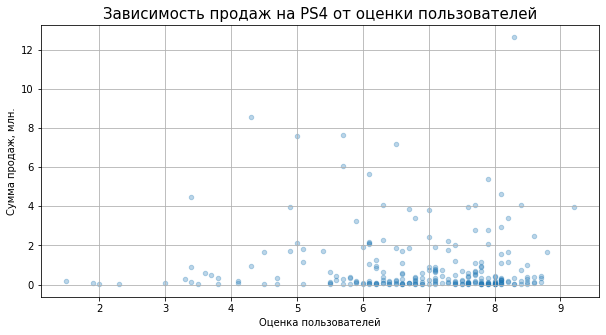

In [45]:
PS4_sales_user.plot(x='user_score', y='sales_sum', kind='scatter', alpha=0.3, figsize=(10, 5),grid=True) 

plt.ylabel("Сумма продаж, млн.")
plt.xlabel("Оценка пользователей")
plt.title('Зависимость продаж на PS4 от оценки пользователей', size=15)

plt.show()

In [46]:
PS4_sales_user['sales_sum'].corr(PS4_sales_user['user_score'])

-0.040131589472697356

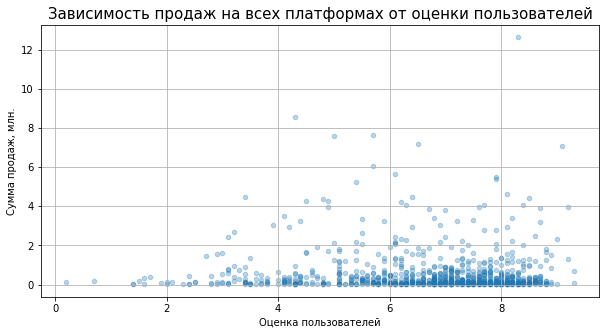

In [47]:
current_data_user = current_data.query('user_score != -1')
current_data_user.plot(x='user_score', y='sales_sum', kind='scatter', alpha=0.3, figsize=(10, 5),grid=True) 

plt.ylabel("Сумма продаж, млн.")
plt.xlabel("Оценка пользователей")
plt.title('Зависимость продаж на всех платформах от оценки пользователей', size=15)

plt.show()

In [48]:
current_data_user['sales_sum'].corr(current_data_user['user_score'])

-0.013070305002484585

***Корреляция между оценкой пользователей и уровнем продаж практически равна нулю, что для PS4, что для других платформ.***

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 В задании написано: <b>Соотнесите выводы с продажами игр на других платформах.</b> А сделанно только одна и остальное суммарно. Выводы, сделанные на основе диаграмм рассеяния и расчетов по нескольким платформам выглядят "весомей" и убедительней. Все платформы не надо, достаточно штук пять. Построение диаграмм рассеяния и расчет корреляции можно сделать циклом по каждой платформе и по каждому виду отзывов.</font>

</font><font color='Blue'><b>Комментарий студента 1 </b></font><br>
**Соотнесите выводы с продажами игр на других платформах.** 

***Из формулировки задания, к сожалению, не очевидно, что нужно делать 5 сравнений. Я прочитала это задание как сравнение с общей картиной.***

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='Red'>🛠 Ошибка не исправлена.</font><br>
<font color='DarkGreen'>👌 Увы, в реальных проектах тоже не бывает однозначных формулировок, не всегда заказчик является аналитиком и может сформулировать задание в наших терминах. А вот плана исследования с пошаговой инструкцией ни когда не бывает. Приходится уточнять у заказчика, что подразумевается под той или иной формулировкой. В учебном проекте роль заказчика исполняет ревьюер, который и уточняет эти формулировки.</font>

</font><font color='Blue'><b>Комментарий студента 2 </b></font><br>
***Добавила этот блок.***

#### Сравнение влияния отзывов пользователей и критиков на продажи на платформе PS4 с влиянием на продажи на 6ти других платформах

In [49]:
# Комментарий ревьюера 3
temp = current_data.copy() # создаем копию датасета до преобразования

In [50]:
#current_data = current_data.query('critic_score != -1 and user_score != -1')

<font color='DarkBlue'><b>Комментарий ревьюера 3</b></font><br>
<font color='Red'>🛠 Как-то оптом отфильтровываем заглушки. Если анализируем отзывы пользователей, то фильтруем заглушки по ним. Если анализируем отзывы критиков, то фильтруем эти заглушки. А вот удаление одновременно и тех и других ведет к необоснованному удалению данных и искажению расчета корреляции. См.код ниже.</font>

</font><font color='Blue'><b>Комментарий студента 3 </b></font><br>
***Мне казалось правильным анализировать массив, в котором оба вида оценок присутвуют.***
***Внесла изменения в код.***

<font color='DarkBlue'><b>Комментарий ревьюера 4</b></font><br>
<font color='DarkMagenta'>👉 Это можно было делать если вместо заглушек оставили пропуски, они не мешают ни построению диаграмм, ни расчету корреляции. А с заглушками так нельзя.</font>

<font color='DarkBlue'><b>Комментарий ревьюера 4</b></font><br>
<font color='DarkGreen'>👌 В чем разница, оставлять NaN или ставить заглушку:<br>
- NaN нам не мешают при построении графиков и расчете корреляции, но искажает расчет в тесте Стьюдента мы получим NaN. А так как пропуск не везде мешает, то мы можем забыть его отфильтровать и получить не верный результат. В отдельных случаях наличие пропуска в датасете не связано с низким качеством сбора данных датасета, а может являтся значимым признаком, но если мы пропуск не заменим на заглушку, то мы этого даже не заметим. Пример в нашем проекте - хитрый рейтинг ESRB.
- Заглушка нам везде мешает, по этому мы при анализе целевого параметра, который в датасете содержал NaN, мы всегда отфильтровываем ее. Заглушку лучше ставить далеко вне диапазона целевых параметров. Если мы вдруг забудем ее отфильтровать, то сразу заметим при преобразованиях. Тип данных заглушки должен соответствовать типу данных колонки, пропуски которой меняем на заглушку. Заглушка так же показывает, что мы оценили количество пропусков в датасете и приняли по ним обоснованное решение. Но мы можем сделать анализ и с учетом заглушки и обнаружить неявный признак который нес пропуск. Что мы и сделали в этом проекте.</font>

In [51]:
# Комментарий ревьюера 3
print(len(temp.query("critic_score != -1")))
print(len(temp.query("user_score != -1")))
print(len(temp.query("critic_score != -1 & user_score != -1")))
print(len(current_data))

718
888
704
1689


In [52]:
relevant_platforms = ["X360", "XOne", "WiiU", "PS3", "3DS", "PC"]

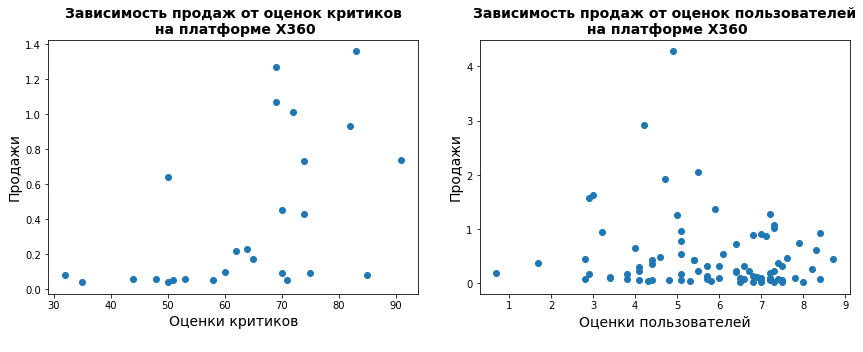

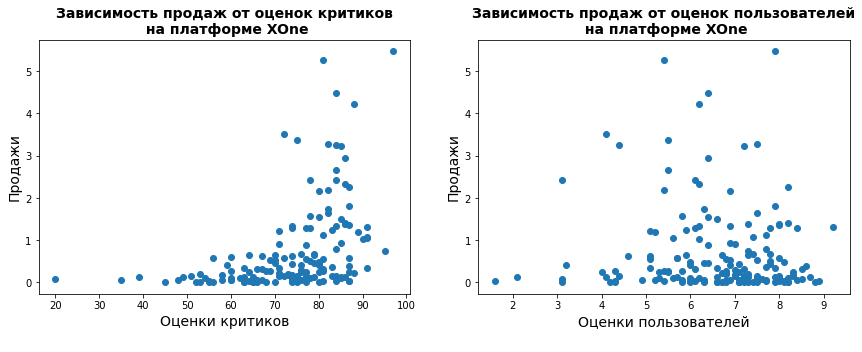

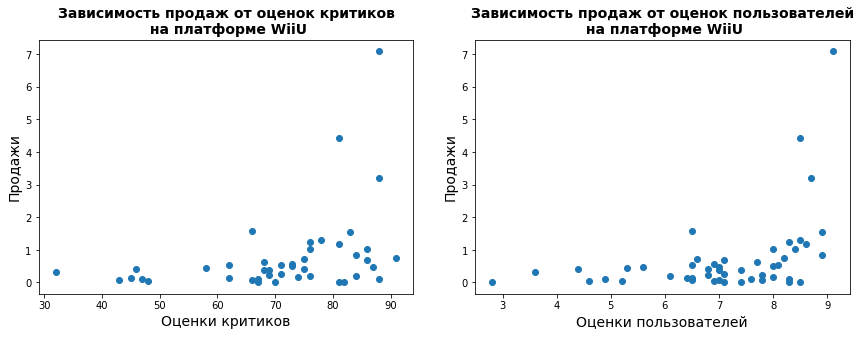

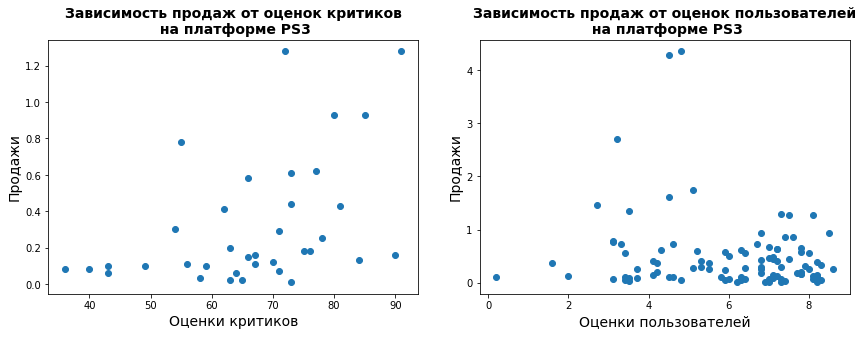

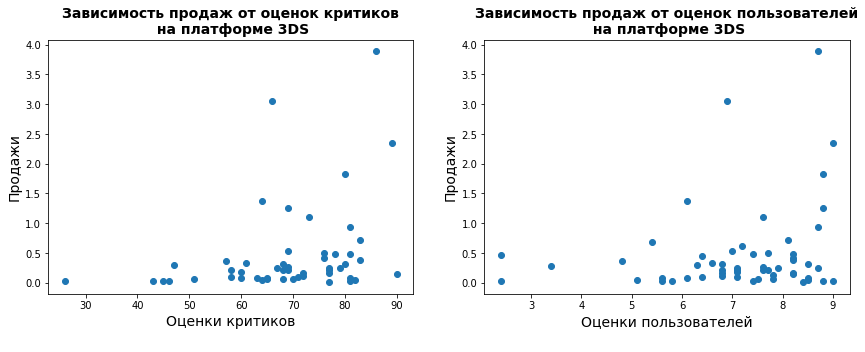

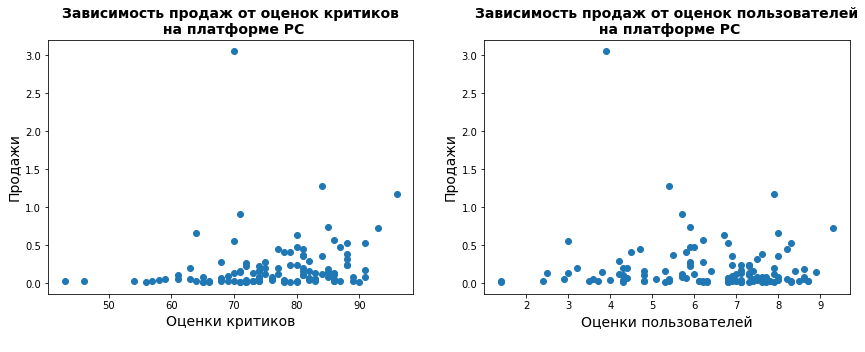

In [53]:
# используем цикл для построения диаграмм рассеяния
# диаграммы зависимости продаж от оценок критиков и пользователей расположим рядом слева и справа соответственно

for name_platform in relevant_platforms:
    x_critic = current_data_critic[current_data_critic['platform']==name_platform]['critic_score']
    y_critic = current_data_critic[current_data_critic['platform']==name_platform]['sales_sum']
    
    x_user = current_data_user[current_data_user['platform']==name_platform]['user_score']
    y_user = current_data_user[current_data_user['platform']==name_platform]['sales_sum']
    
    
    fig = plt.figure(figsize=(12, 5))
    
    ax1 = fig.add_subplot(121)
    ax1.scatter(x_critic, y_critic)
    ax1.set_title('Зависимость продаж от оценок критиков\n на платформе '+name_platform, fontsize=14, fontweight="bold")
    ax1.set_xlabel('Оценки критиков\n', fontsize=14)
    ax1.set_ylabel('Продажи', fontsize=14)
    
    ax2 = fig.add_subplot(122)
    ax2.scatter(x_user, y_user)
    ax2.set_title('Зависимость продаж от оценок пользователей\n на платформе '+name_platform, fontsize=14, fontweight="bold")
    ax2.set_xlabel('Оценки пользователей\n', fontsize=14)
    ax2.set_ylabel('Продажи', fontsize=14)
    
    plt.tight_layout(w_pad=3)

In [54]:
print('Коэффициент корреляции')
print()
print('{: <30}|{: <30}'.format('продажи и оценки критиков', 'продажи и оценки пользователей'))
print('_____________________________________________________________')
print()
for name_platform in relevant_platforms:
    print(name_platform)
    print()
    print('{: <30.2}{: <30.2}'.format(current_data_critic[current_data_critic['platform']==name_platform]['sales_sum']\
                                   .corr(current_data_critic[current_data_critic['platform']==name_platform]['critic_score'])\
                                   
                                   , current_data_user[current_data_user['platform']==name_platform]['sales_sum']\
                                   .corr(current_data_user[current_data_user['platform']==name_platform]['user_score'])))
    print('_____________________________________________________________')
    print()

Коэффициент корреляции

продажи и оценки критиков     |продажи и оценки пользователей
_____________________________________________________________

X360

0.53                          -0.14                         
_____________________________________________________________

XOne

0.43                          -0.07                         
_____________________________________________________________

WiiU

0.37                          0.41                          
_____________________________________________________________

PS3

0.45                          -0.17                         
_____________________________________________________________

3DS

0.31                          0.22                          
_____________________________________________________________

PC

0.17                          -0.072                        
_____________________________________________________________



</font><font color='Blue'><b>Комментарий студента 2 </b></font><br>
***На данном этапе мы  анализировали влияние оценок критиков и пользователей на объем продаж на платформах по медианным продажам:***
- ***превышающих значения PS4 - X360, XOne;***
- ***близких к значениям PS4 - WiiU, PS3;***
- ***с более низкими значениями относительно PS4 - 3DS, PC.*** 

***Корреляция между оценками критиков и уровнем продаж присутствует у всех платформ, кроме PC. Уровень корреляции находится в диапазоне от 0.53 у X360 до 0.31 у 3DS. Влияние оценок критиков на продажи примерно одинаковое для PS4 (0.40), XOne (0.43) и PS3 (0.45) - т.е. присутствует, но не слишком сильное.

***Корреляция между оценками пользователей и уровнем продаж отсутствует у почти у всех проанализированных платформ также как и у PS4. Связь между отзывами пользователей и продажами есть только на платформе WiiU (корреляция 0,41).***

***Таким образом, влияние оценок критиков и пользорвателей на продажи на платформе PS4 довольно типично для платформ с сопоставимыми продажами: оценки критиков имеют некоторое влияние на продажи, а отзывы пользователей не имеют влияния на продажи совсем.***

<font color='DarkBlue'><b>Комментарий ревьюера 4</b></font><br>
<font color='DarkGreen'>👌 Для оценки корреляции лучше пользоваться вот этой шкалой:</font>
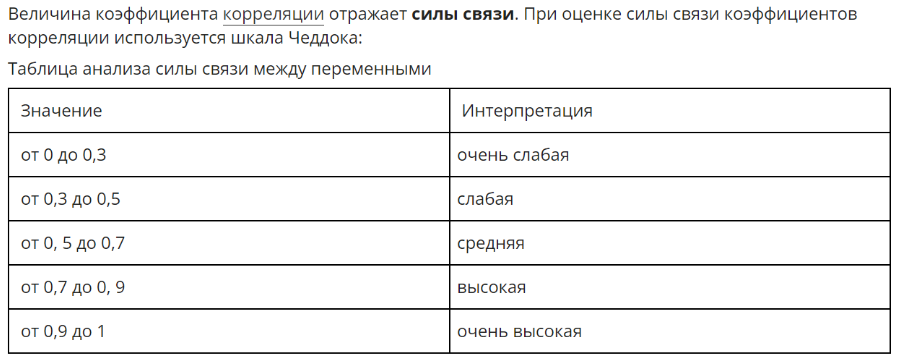

### Распределение игр по жанрам

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

<font color='DarkBlue'><b>Комментарий ревьюера</b></font>
<br><font color='Red'>🛠 Для анализа должен использоваться датасет актуального периода.</font>

</font><font color='Blue'><b>Комментарий студента 1 </b></font><br>
***Исправлено.***

In [55]:
current_data = data.query('year_of_release > 2013')

In [56]:
genre_rating = current_data.pivot_table(index='genre', values='sales_sum', aggfunc=['sum']).reset_index()
genre_rating.columns = ['genre', 'sales_sum']
genre_rating = genre_rating.sort_values(by='sales_sum', ascending=False)
genre_rating

,genre,sales_sum
0,Action,199.36
8,Shooter,170.94
10,Sports,109.48
7,Role-Playing,101.44
3,Misc,37.55
2,Fighting,28.22
6,Racing,27.52
4,Platform,18.09
1,Adventure,17.55
9,Simulation,13.13


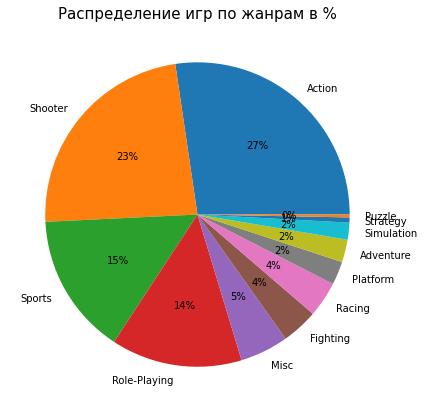

In [57]:
fig = plt.figure(figsize=(10, 7))
plt.pie(genre_rating['sales_sum'], autopct='%1.0f%%', labels=genre_rating['genre'])

plt.title('Распределение игр по жанрам в %', size=15)

plt.show()

***За всю историю продаж выделяется группа самых продаваемых жанров - Action (27%), Shooter (23%), Sports (15%) и Role-Playing (14%).***

***Наименее продаваемые игры - Puzzle и Strategy.***

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Здесь попали в ловушку, что максимальные продажи являются самыми прибыльными. Но в данных продажи по жанру для разных платформ, и если одна платформа со своей одной игрой в данном жанре выстрелила, а остальные провалились, то все равно будет виден максимум общих продаж. Но для прибыльности нужны стабильные жанры, который приносят доход не зависимо от платформы, значит на этот жанр есть устойчивый спрос.</font><br>
<font color='Red'>🛠 По этому лучше добавить сравнение медианных продаж, проиллюстрировав их диаграммами размаха и изменить промежуточные выводы.</font>

</font><font color='Blue'><b>Комментарий студента 1 </b></font><br>
***Самое большое значение по медианным продажам у шутеров.*** 

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 В проекте под "прибыльностью" понимается наличие устойчивого спроса пользователей на данный жанр. Можно сделать уникальный сюжет, быстрый движок, красивую графику и вложить немеряно денег в рекламу и продажи игры подпрыгнут. Но нам лучше выбирать игру из жанра, на которой есть постоянный спрос независимо от маркетинговых усилий производителей игр.<br>
Это хороший пример, когда на одних и тех же данных разные диаграммы дают разный анализ. Визуализация это не только красивое представление табличных данных, а еще и инструмент анализа.</font>

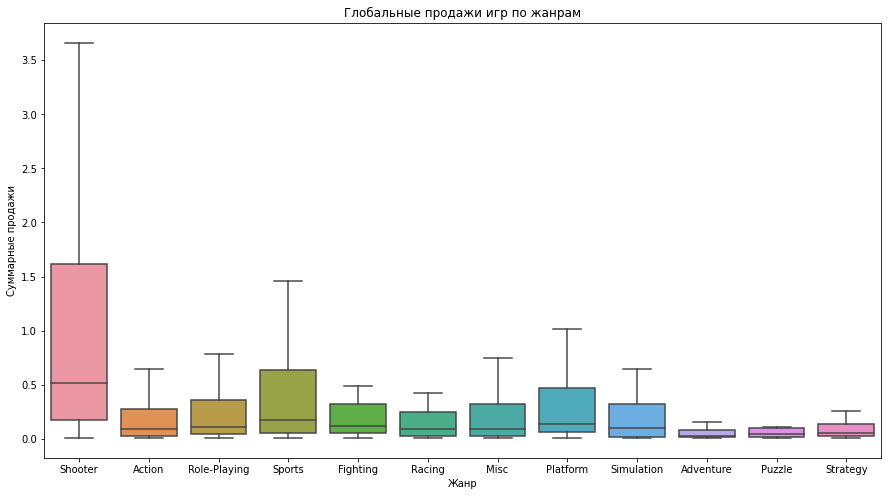

In [58]:
fig = plt.subplots(figsize=(15,8))
plt.title("Глобальные продажи игр по жанрам")
plot = sns.boxplot(x="genre", y="sales_sum", data=current_data, showfliers=False)
plt.xlabel('Жанр')
plt.ylabel('Суммарные продажи')
plt.show()

## Шаг 4. Составление портрета пользователя для каждого региона

### Топ-5 платформ для каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font>
<br><font color='Red'>🛠 Для анализа должен использоваться датасет актуального периода.</font>

</font><font color='Blue'><b>Комментарий студента 1 </b></font><br>
***Исправлено.***

In [59]:
top_sales_na = current_data.pivot_table(index=['platform'], values=['na_sales'], aggfunc=['sum']).reset_index()
top_sales_na.columns = ['platform', 'na_sales']
top_sales_na = top_sales_na.sort_values(by='na_sales', ascending=False)
top_sales_na = top_sales_na.head(5)
top_sales_na

,platform,na_sales
3,PS4,98.61
9,XOne,81.27
8,X360,28.30
0,3DS,22.64
2,PS3,22.05


<font color='DarkBlue'><b>Комментарий ревьюера</b></font>
<br><font color='Red'>🛠 Для анализа должен использоваться датасет актуального периода.</font>

</font><font color='Blue'><b>Комментарий студента 1 </b></font><br>
***Исправлено.***

In [60]:
top_sales_eu = current_data.pivot_table(index=['platform'], values=['eu_sales'], aggfunc=['sum']).reset_index()
top_sales_eu.columns = ['platform', 'eu_sales']
top_sales_eu = top_sales_eu.sort_values(by='eu_sales', ascending=False)
top_sales_eu = top_sales_eu.head(5)
top_sales_eu

,platform,eu_sales
3,PS4,130.04
9,XOne,46.25
2,PS3,25.54
1,PC,17.97
0,3DS,16.12


<font color='DarkBlue'><b>Комментарий ревьюера</b></font>
<br><font color='Red'>🛠 Для анализа должен использоваться датасет актуального периода.</font>

</font><font color='Blue'><b>Комментарий студента 1 </b></font><br>
***Исправлено.***

In [61]:
top_sales_jp = current_data.pivot_table(index=['platform'], values=['jp_sales'], aggfunc=['sum']).reset_index()
top_sales_jp.columns = ['platform', 'jp_sales']
top_sales_jp = top_sales_jp.sort_values(by='jp_sales', ascending=False)
top_sales_jp = top_sales_jp.head(5)
top_sales_jp

,platform,jp_sales
0,3DS,44.24
3,PS4,15.02
5,PSV,14.54
2,PS3,11.22
7,WiiU,7.31


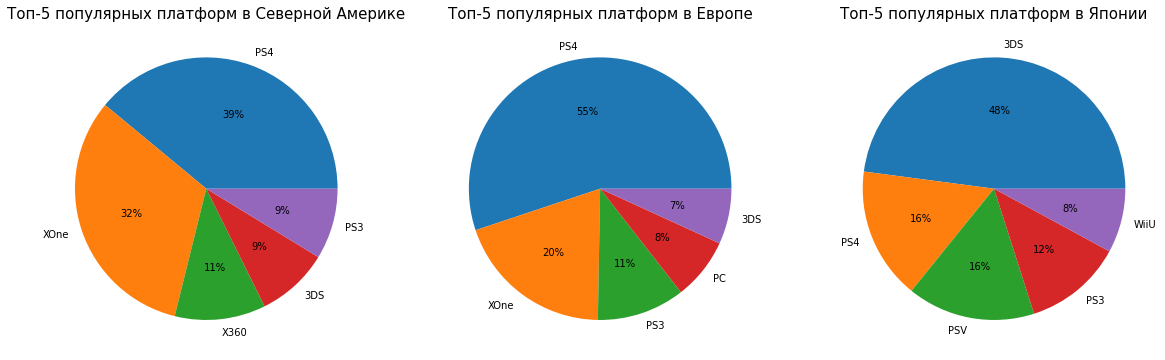

In [62]:
fig = plt.figure(figsize=(20, 10))

ax1 = plt.subplot(1, 3, 1)
plt.pie(top_sales_na['na_sales'], autopct='%1.0f%%', labels=top_sales_na['platform'])
plt.title('Топ-5 популярных платформ в Северной Америке', size=15)

ax2 = plt.subplot(1, 3, 2)
plt.pie(top_sales_eu['eu_sales'], autopct='%1.0f%%', labels=top_sales_eu['platform'])
plt.title('Топ-5 популярных платформ в Европе', size=15)

ax3 = plt.subplot(1, 3, 3)
plt.pie(top_sales_jp['jp_sales'], autopct='%1.0f%%', labels=top_sales_jp['platform'])
plt.title('Топ-5 популярных платформ в Японии', size=15)

plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 В задании указано: <br><b>Самые популярные платформы (топ-5). Опишите различия в долях продаж.</b></font>
<br>
<font color='DarkMagenta'>👉 И круговая диаграмма может отобразить доли, но при этом надо ее строить не только по топ-5 (здесь доли показаны как раз от суммы топ, а не всего регионального рынка). Для этого следует собрать остальные платформы в отдельную группу "другие" и вывести ее на диаграмму. Если это будет затруднительно, то можно просто посчитать доли вывести их таблицей. Таким образом, задание проекта будет выполнено.</font>

***В Северной Америке лидируют PS4 (Sony, Япония), XOne и X360 (Microsoft, США), 3DS(Nintendo, Япония), PS3 (Sony, Япония).***

***В Европе - PS4 (Sony, Япония), XOne (Microsoft, США), PS3 (Sony, Япония), PC и 3DS(Nintendo, Япония).***

***В Японии - 3DS (Nintendo, Япония), PS4 (Sony, Япония), PSV (Sony, Япония), PS3 (Sony, Япония), WiiU(Nintendo, Япония).***

***Большая часть платформ - японские, они присутствуют на всех рынках.***

***В Северной Америке и Европе значительную долю рынка занимают платформы от Microsoft (XOne и X360), что логично, учитывая всемирную распространенность продукции этой компании и узнаваемость бренда. Но, поскольку, первопроходцами в этой области были именно японские компании, их суммарная доля на рынках Северной Америки и Европы преобладает.***

<font color='DarkBlue'><b>Комментарий ревьюера 4</b></font><br>
<font color='DarkMagenta'>👉 Собрать не входящие в топ в группу "другие" можно вот так, см. код ниже. В цикл можно встроить и построение диаграмм.</font>

In [63]:
# Комментарий ревьюера 4
temp, target = current_data.copy(), 'platform'  # Делаем копию датасета актуального периода в переменную temp, переменной target
                                                # присваиваем наименование колонки по которой будем строить таблицы. Можно так же
                                                # использовать genre. Прописывая переменный через запятую, таким образом 
                                                # можно все сделать водну строчку кода.
list_region = temp.columns[4:7]                 # Создаем список имен колонок с 4-ой по 7-ую, в этих именах указан регион, это
                                                # что бы не прописывать список руками.
for i in range(3):                              # Создаем цикл, который будет выполняться три раза, по числу регионов,
                                                # присваивая пременной i значения от 0 до 2. это индексы в нашем списке регионов
    df_ = (temp.groupby(target)[list_region[i]].sum().reset_index(). # Создаем датасет из скопированного актуального периода,
           sort_values(by=list_region[i], ascending=False)[:5])      # группируем его в данном случае по платформам, но по 
                                                                     # фильтру первого региона из списка и суммируем (то есть 
                                                                     # получаем сумму продаж по каждой платформе в данном 
                                                                     # регионе), затем обновляем индексы этой таблицы и 
                                                                     # сортируем по выбранному региону, затем делаем срез первых 
                                                                     # пяти, в итоге получаем топ-5.
                                                                     # Все это сделано одной строчкой кода вместо трех строк.
    df_ = df_.append({target: 'Other', list_region[i]: temp[list_region[i]].sum() - df_[list_region[i]].sum()}, ignore_index= True)                                            # Тут к полученному ранее датасету с топ-5 добавляем колонку, которую называм 
                                                 # К нашему датасету добавляем строку 'Other' и туда добавляем продажи других 
                                                 # платформ, просто вычисляя разницу сумм продаж по всем платформам минус 
                                                 # сумма продаж платформ топ-5.
    df_.index =df_[target]                       # В итоге получили таблицу с продажами по пяти платформам и другим, но индексы 
                                                 # в этой таблице 0, 1, 2... Поэтому заменяем колонку с индексами колонкой 
                                                 # target, в которой перечень платформ. 
    df_.drop(target, axis= 1 , inplace= True )   # Так как у нас теперь две колонки с именами платформ идексы и target, то 
                                                 # вторую удалям за не надобностью
    display(df_)                                 # И выводим получившуюся таблицу при первом проходе цикла. Здесь можно вместо
                                                 # таблицы сразу строить диаграмму по полученной таблице.

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05
Other,31.19


,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12
Other,34.76


,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31
Other,0.76


### Топ-5 жанров для каждого региона

- Самые популярные жанры (топ-5). Поясните разницу.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font>
<br><font color='Red'>🛠 Для анализа должен использоваться датасет актуального периода.</font>

</font><font color='Blue'><b>Комментарий студента 1 </b></font><br>
***Исправлено.***

In [64]:
top_genre_na = current_data.pivot_table(index=['genre'], values=['na_sales'], aggfunc=['sum']).reset_index()
top_genre_na.columns = ['genre', 'na_sales']
top_genre_na = top_genre_na.sort_values(by='na_sales', ascending=False)
top_genre_na = top_genre_na.head(5)
top_genre_na

,genre,na_sales
8,Shooter,79.02
0,Action,72.53
10,Sports,46.13
7,Role-Playing,33.47
3,Misc,15.05


<font color='DarkBlue'><b>Комментарий ревьюера</b></font>
<br><font color='Red'>🛠 Для анализа должен использоваться датасет актуального периода.</font>

</font><font color='Blue'><b>Комментарий студента 1 </b></font><br>
***Исправлено.***

In [65]:
top_genre_eu = current_data.pivot_table(index=['genre'], values=['eu_sales'], aggfunc=['sum']).reset_index()
top_genre_eu.columns = ['genre', 'eu_sales']
top_genre_eu = top_genre_eu.sort_values(by='eu_sales', ascending=False)
top_genre_eu = top_genre_eu.head(5)
top_genre_eu

,genre,eu_sales
0,Action,74.68
8,Shooter,65.52
10,Sports,45.73
7,Role-Playing,28.17
6,Racing,14.13


<font color='DarkBlue'><b>Комментарий ревьюера</b></font>
<br><font color='Red'>🛠 Для анализа должен использоваться датасет актуального периода.</font>

</font><font color='Blue'><b>Комментарий студента 1 </b></font><br>
***Исправлено.***

In [66]:
top_genre_jp = current_data.pivot_table(index=['genre'], values=['jp_sales'], aggfunc=['sum']).reset_index()
top_genre_jp.columns = ['genre', 'jp_sales']
top_genre_jp = top_genre_jp.sort_values(by='jp_sales', ascending=False)
top_genre_jp = top_genre_jp.head(5)
top_genre_jp

,genre,jp_sales
7,Role-Playing,31.16
0,Action,29.58
2,Fighting,6.37
3,Misc,5.61
8,Shooter,4.87


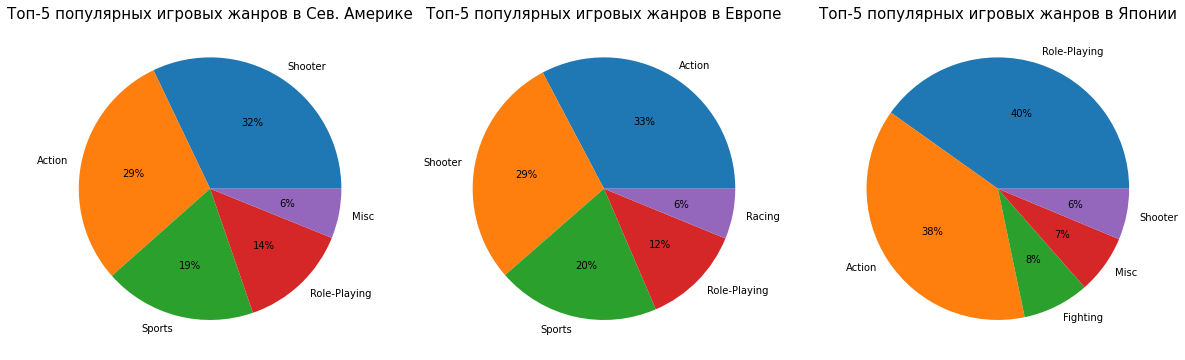

In [66]:
fig = plt.figure(figsize=(20, 10))

ax1 = plt.subplot(1, 3, 1)
plt.pie(top_genre_na['na_sales'], autopct='%1.0f%%', labels=top_genre_na['genre'])
plt.title('Топ-5 популярных игровых жанров в Сев. Америке', size=15)

ax2 = plt.subplot(1, 3, 2)
plt.pie(top_genre_eu['eu_sales'], autopct='%1.0f%%', labels=top_genre_eu['genre'])
plt.title('Топ-5 популярных игровых жанров в Европе', size=15)

ax3 = plt.subplot(1, 3, 3)
plt.pie(top_genre_jp['jp_sales'], autopct='%1.0f%%', labels=top_genre_jp['genre'])
plt.title('Топ-5 популярных игровых жанров в Японии', size=15)

plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Хорошо сделан анализ и визуализирован круговыми диаграммами. А вот данные не вошедшие в ТОП, как правило, суммируют и выводят отдельной группой "Другие". Тогда на такой диаграмме хорошо видны все региональные рынки игр с разбиением на платформы/жанры. Какая платформа/жанр занимает какую долю рынка. И наша визуализация несет определенную бизнес-логику, связанную именно с долями рынка занимаемыми платформами/жанрами. А этого не дают другие виды диаграмм.  Примерно вот так:</font>
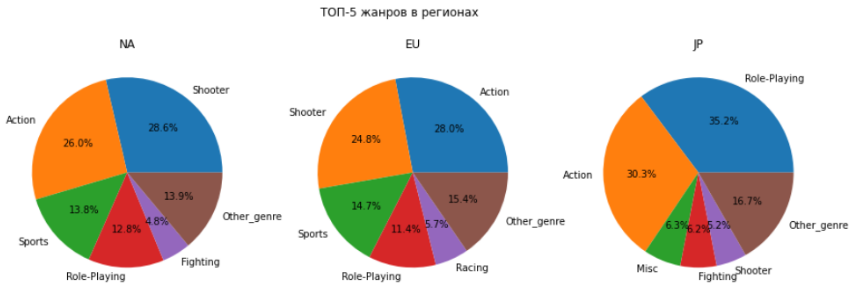

***Пользователи в Северной Америке предпочитают жанры Shooter, Action, Sports, Role-Playing, Misc.***

***Пользователи в Европе предпочитают жанры Action, Shooter, Sports, Role-Playing, Racing. Как мы видим, набор почти тот же, что и в Северной Америке, отличается только 5я позиция.***

***Пользователи в Японии предпочитают Role-Playing, Action, Fighting, Misc, Shooter. С Северной Америкой пересечение идет в 4х жанрах, а с Европой только в 3х. В Японии жанр Role-Playing доминирует на рынке игр.***

### Влияние рейтинга ESRB на продажи в каждом регионе

- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

<font color='DarkBlue'><b>Комментарий ревьюера</b></font>
<br><font color='Red'>🛠 Для анализа должен использоваться датасет актуального периода.</font>

</font><font color='Blue'><b>Комментарий студента 1 </b></font><br>
***Исправлено.***

In [67]:
na_rating_sales = (current_data
                                .pivot_table(index='rating', values='na_sales', aggfunc='sum')
                                .sort_values(by='na_sales', ascending=False)
                                .reset_index()
                   )
na_rating_sales

,rating,na_sales
0,M,96.42
1,no_rating,64.72
2,E,50.74
3,T,38.95
4,E10+,33.23


In [68]:
eu_rating_sales = (current_data
                                .pivot_table(index='rating', values='eu_sales', aggfunc='sum')
                                .sort_values(by='eu_sales', ascending=False)
                                .reset_index()
                   )
eu_rating_sales

,rating,eu_sales
0,M,93.44
1,no_rating,58.95
2,E,58.06
3,T,34.07
4,E10+,26.16


In [69]:
jp_rating_sales = (current_data
                                .pivot_table(index='rating', values='jp_sales', aggfunc='sum')
                                .sort_values(by='jp_sales', ascending=False)
                                .reset_index()
                   )
jp_rating_sales

,rating,jp_sales
0,no_rating,56.90
1,T,14.78
2,E,8.94
3,M,8.01
4,E10+,4.46


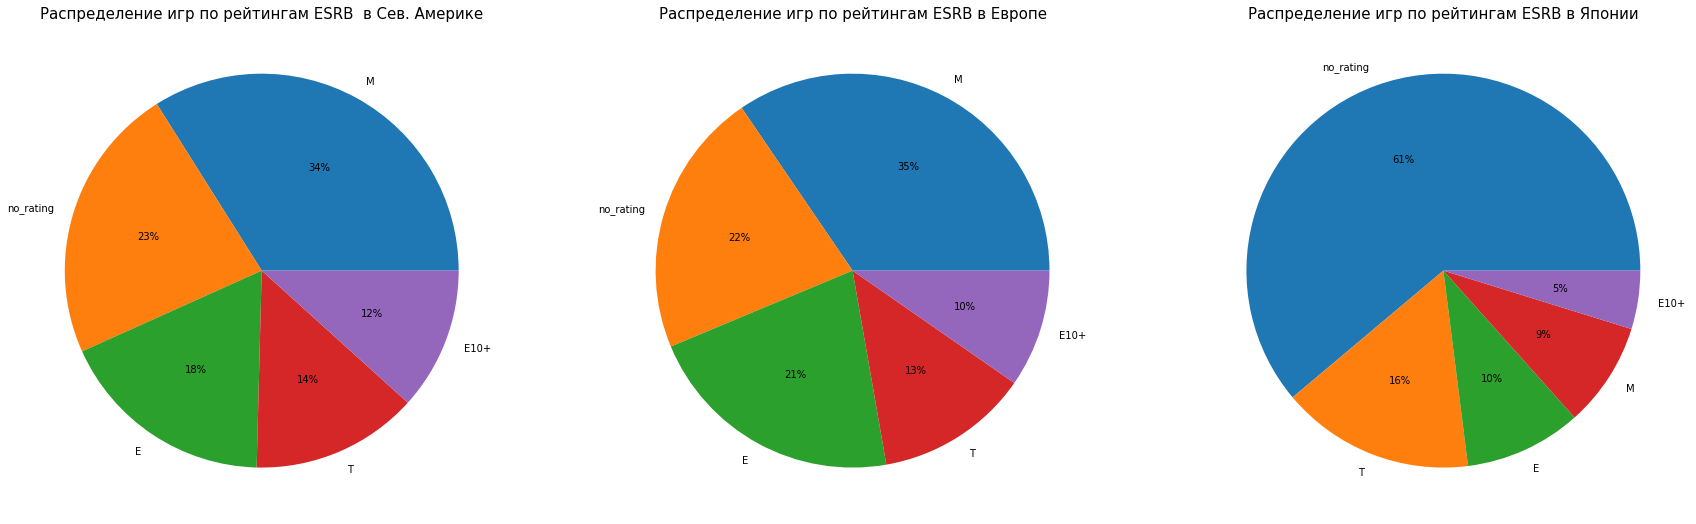

In [70]:
fig = plt.figure(figsize=(30, 10))

ax1 = plt.subplot(1, 3, 1)
plt.pie(na_rating_sales['na_sales'], autopct='%1.0f%%', labels=na_rating_sales['rating'])
plt.title('Распределение игр по рейтингам ESRB  в Сев. Америке', size=15)

ax2 = plt.subplot(1, 3, 2)
plt.pie(eu_rating_sales['eu_sales'], autopct='%1.0f%%', labels=eu_rating_sales['rating'])
plt.title('Распределение игр по рейтингам ESRB в Европе', size=15)

ax3 = plt.subplot(1, 3, 3)
plt.pie(jp_rating_sales['jp_sales'], autopct='%1.0f%%', labels=jp_rating_sales['rating'])
plt.title('Распределение игр по рейтингам ESRB в Японии', size=15)

plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Для дискретных данных диаграмма рассеяния не показательна, следует строить диаграмму по суммам продаж по каждой категории возрастного рейтинга.</font>

</font><font color='Blue'><b>Комментарий студента 1 </b></font><br>
***Исправлено.**

***На рынке в Сев. Америке популярны игры с рейтингами M (для взрослых), E (для всех), T (для подростков), E10+ (для всех начиная с 10 лет). 23% рынка занимают игры без рейтинга.***

***На рынке в Европе популярны игры с такими же рейтингами как и в Сев. Америке почти в тех же пропорциях. 22% рынка занимают игры без рейтинга.***

***На рынке в Японии популярны игры с такими же рейтингами как и в Сев. Америке, однако большую часть рынка - 61% занимают игры без рейтинга. Возможно это связано с тем, что рейтинг ESRB действует на американском рынке и не все игры, выпускаемые в Японии, были оценены этим рейтингом. Также покупатели в Японии могут и вовсе на этот рейтинг не ориетироваться, т.к. на этом рынке наверняка есть свой рейтинг.***

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Это пример, когда пропуски в датасете имеют значение. В Японии свой рейтинг и им мало интересны игры с Северо-Американским рейтингом. А есть еще рейтинги ЕС, отдельно в Германии, в Австралии и т.д. Но у нас нет по ним данных и в данном случае пропуск является признаком, что игра имеет другой рейтинг и выпускалась не в Северной Америке.</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 При предобработке данных была поставлена заглушка на пропуски в рейтинге ESRB и это правильно. Но ее отфильтровали и игры без рейтинга оказываются полностью исключенными из анализа. Продажи именно этих игр могут указать на ключевое различие в регионах. По этому необходимо сделать анализ вместе с заглушкой.</font><br>
<font color='DarkMagenta'>👉 Проблема в том, что если посмотреть в инете, что из себя представляет рейтинг ESRB, то окажется, что он предназначен для маркировки игр для США и Канады. И логично, что для других регионов он не заполняется. Наша задача смотреть шире на исходный датасет, так как за цифрами находятся реальные бизнес-процессы. Необходимо это учитывать при предобработке данных.</font>

## Шаг 5. Проверка гипотез

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.

Поясните:
1. Как вы сформулировали нулевую и альтернативную гипотезы;
2. Какой критерий применили для проверки гипотез и почему.

### Проверка гипотезы о равенстве пользовательских рейтингов платформ Xbox One и PC

***H0: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.***

***H1: средние пользовательские рейтинги платформ Xbox One и PC не являются одинаковыми.***

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, правильно сформулированы гипотезы.</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font>
<br><font color='Red'>🛠 Для анализа должен использоваться датасет актуального периода.</font>

</font><font color='Blue'><b>Комментарий студента 1 </b></font><br>
***Исправлено.***

In [71]:
data_rating = current_data.query('user_score != -1')
data_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 42 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             888 non-null    object 
 1   platform         888 non-null    object 
 2   year_of_release  888 non-null    int64  
 3   genre            888 non-null    object 
 4   na_sales         888 non-null    float64
 5   eu_sales         888 non-null    float64
 6   jp_sales         888 non-null    float64
 7   other_sales      888 non-null    float64
 8   critic_score     888 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           888 non-null    object 
 11  sales_sum        888 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 90.2+ KB


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что отфильтровали заглушки.</font>

In [72]:
sample_1 = data_rating.query('platform == "XOne"')
sample_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 165 to 16660
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             165 non-null    object 
 1   platform         165 non-null    object 
 2   year_of_release  165 non-null    int64  
 3   genre            165 non-null    object 
 4   na_sales         165 non-null    float64
 5   eu_sales         165 non-null    float64
 6   jp_sales         165 non-null    float64
 7   other_sales      165 non-null    float64
 8   critic_score     165 non-null    float64
 9   user_score       165 non-null    float64
 10  rating           165 non-null    object 
 11  sales_sum        165 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 16.8+ KB


In [73]:
sample_2 = data_rating.query('platform == "PC"')
sample_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 458 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             122 non-null    object 
 1   platform         122 non-null    object 
 2   year_of_release  122 non-null    int64  
 3   genre            122 non-null    object 
 4   na_sales         122 non-null    float64
 5   eu_sales         122 non-null    float64
 6   jp_sales         122 non-null    float64
 7   other_sales      122 non-null    float64
 8   critic_score     122 non-null    float64
 9   user_score       122 non-null    float64
 10  rating           122 non-null    object 
 11  sales_sum        122 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 12.4+ KB


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 На основании чего сокращается одна выборка?</font>

</font><font color='Blue'><b>Комментарий студента 1 </b></font><br>
***Я делала выборки для одного периода времени. После корректировки с основного датасета на актуальный это уже не имеет значения.***

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 Ведь сразу возникло сомнение по выборкам, которые формировали по всему датасету. А при использовании актуального периода его бы не было.</font>

In [74]:
sample_1 = sample_1['user_score']
sample_2 = sample_2['user_score']

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(sample_1, sample_2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно, что для тестирования гипотез использован двусторонний t-тест.</font>

***По результатам статистического теста отвергнуть нулевую гипотезу не удалось. Следовательно, средние пользовательские рейтинги платформ Xbox One и PC одинаковые с большой долей вероятности.***

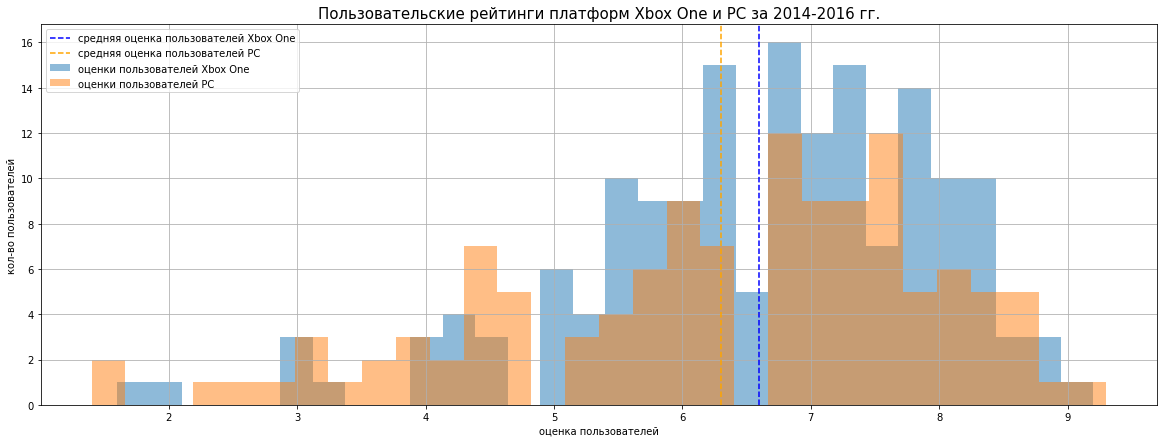

In [75]:
plt.figure(figsize=(20,7))
plt.grid(True)

plt.ylabel("кол-во пользователей")
plt.xlabel("оценка пользователей")

plt.hist(sample_1, bins=30, alpha=0.5, label='оценки пользователей Xbox One')
plt.hist(sample_2, bins=30, alpha=0.5, label='оценки пользователей PC')

plt.axvline(x=sample_1.mean(), color='blue', linestyle='--', label='средняя оценка пользователей Xbox One')
plt.axvline(x=sample_2.mean(), color='orange', linestyle='--', label='средняя оценка пользователей PC')

plt.title('Пользовательские рейтинги платформ Xbox One и PC за 2014-2016 гг.', size=15)
plt.legend()
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Визуализация данных графиками и диаграммами подразумевает подписи всех осей и название графика  на русском языке, при необходимости наличие меток. Это относится ко всем графикам/диаграммам проекта и является критической ошибкой.</font>

</font><font color='Blue'><b>Комментарий студента 1 </b></font><br>
***Не было только заголовка. Добавила.***

***Визуализация на графике подтверждает гипотезу - средняя оценка пользователей XOne и PC в одном диапазоне - от 6 до 7 баллов.***

### Проверка гипотезы о равенстве пользовательских рейтингов жанров Action и Sports

***H0: средние пользовательские рейтинги жанров Action и Sports одинаковые.***

***H1: средние пользовательские рейтинги жанров Action и Sports разные.***

<font color='DarkBlue'><b>Комментарий ревьюера</b></font>
<br><font color='Red'>🛠 Для анализа должен использоваться датасет актуального периода.</font>

</font><font color='Blue'><b>Комментарий студента 1 </b></font><br>
***Исправлено.***

In [76]:
sample_3 = data_rating.query('genre == "Action"')
sample_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 42 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             297 non-null    object 
 1   platform         297 non-null    object 
 2   year_of_release  297 non-null    int64  
 3   genre            297 non-null    object 
 4   na_sales         297 non-null    float64
 5   eu_sales         297 non-null    float64
 6   jp_sales         297 non-null    float64
 7   other_sales      297 non-null    float64
 8   critic_score     297 non-null    float64
 9   user_score       297 non-null    float64
 10  rating           297 non-null    object 
 11  sales_sum        297 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 30.2+ KB


In [77]:
sample_4 = data_rating.query('genre == "Sports"')
sample_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 77 to 16643
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             127 non-null    object 
 1   platform         127 non-null    object 
 2   year_of_release  127 non-null    int64  
 3   genre            127 non-null    object 
 4   na_sales         127 non-null    float64
 5   eu_sales         127 non-null    float64
 6   jp_sales         127 non-null    float64
 7   other_sales      127 non-null    float64
 8   critic_score     127 non-null    float64
 9   user_score       127 non-null    float64
 10  rating           127 non-null    object 
 11  sales_sum        127 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 12.9+ KB


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 И здесь зачем сокращаются выборки? Просто выборки должны делатся на основе датасета актуального периода.</font>

</font><font color='Blue'><b>Комментарий студента 1 </b></font><br>
***Причина была та же - уравнивала периоды.***

In [78]:
sample_3 = sample_3['user_score']
sample_4 = sample_4['user_score']

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(sample_3, sample_4)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


***По результатам статистического теста удалось отвергнуть нулевую гипотезу. Следовательно, средние пользовательские рейтинги жанров Action и Sports разные с большой долей вероятности.***

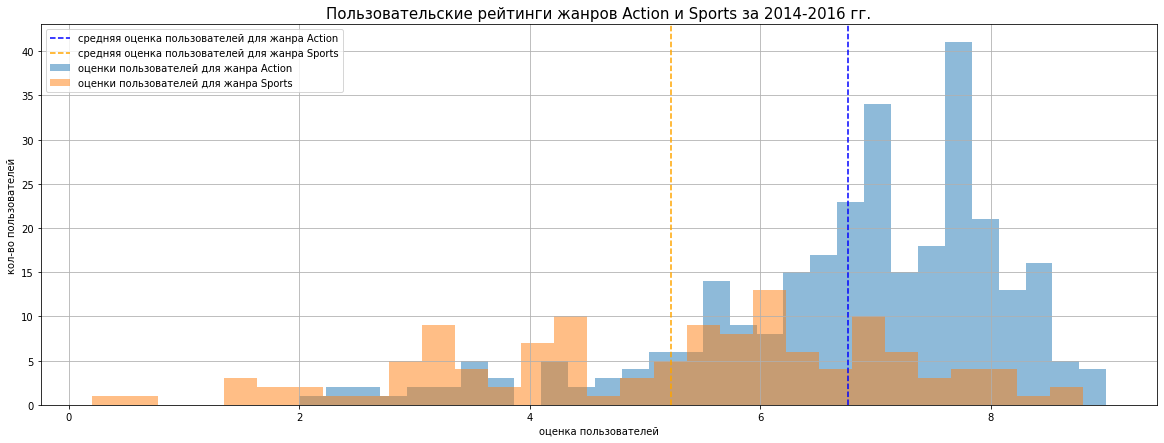

In [79]:
plt.figure(figsize=(20,7))
plt.grid(True)

plt.ylabel("кол-во пользователей")
plt.xlabel("оценка пользователей")

plt.hist(sample_3, bins=30, alpha=0.5, label='оценки пользователей для жанра Action')
plt.hist(sample_4, bins=30, alpha=0.5, label='оценки пользователей для жанра Sports')

plt.axvline(x=sample_3.mean(), color='blue', linestyle='--', label='средняя оценка пользователей для жанра Action')
plt.axvline(x=sample_4.mean(), color='orange', linestyle='--', label='средняя оценка пользователей для жанра Sports')

plt.title('Пользовательские рейтинги жанров Action и Sports за 2014-2016 гг.', size=15)
plt.legend()
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Диаграмма не оформлена необходимым образом.<br>Если есть с этим трудности, то следует обратиться за помощью к преподавателю.</font>

</font><font color='Blue'><b>Комментарий студента 1 </b></font><br>
***Не было только заголовка. Добавила.***

***Визуализация на графике подтверждает результаты стат. теста - средняя оценка пользователей для жанров Action и Sports отличаются. Для Action средняя оценка стремится к 7ми баллам, а для Sports - к 5 баллам.***

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно, что показаны дополнительно средние пользовательские рейтинги и по платформам, и по жанрам, как иллюстрации не противоречивости наших гипотез.</font><br>
<font color='Red'>🛠 Необходимо сделать выводы по данному разделу согласно заданию:<br>
<b>Поясните:<br>
Как вы сформулировали нулевую и альтернативную гипотезы;<br>
Какой критерий применили для проверки гипотез и почему.</b><br>
То есть, необходимо описать принцип формулирования нулевой и альтернативной гипотез, обосновать почему к выборкам применили t-критерий при тестировании гипотез.</font>

</font><font color='Blue'><b>Комментарий студента 1 </b></font><br>
***Оба случая предполагали сравнение средних величин двух независимых друг от друга выборок.***
***Для этого используется стат. тест - st.ttest_ind.***
***Нулевая гипотеза: средние значения выборок равны, альтернативная - средние значения не равны.***

Применять t-тест можно, т.к. три условия выполняются:
1. **Генеральные совокупности не зависят друг от друга**. 
2. **Выборочные средние нормально распределены**. Это условие не должно быть препятствием благодаря ЦПТ. Если размер выборки составляет хотя бы несколько десятков значений, то выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены близко к нормальному вокруг истинного среднего этой совокупности. Это так, даже если сама генеральная совокупность не распределена нормально.
3. **Дисперсии рассматриваемых генеральных совокупностей равны**. Если выборки достаточно велики (30 и больше значений) и равны по размеру между собой, то такой подход оправдан. Симуляции, проведённые учёными, показывают, что даже если дисперсии на самом деле не равны, то тест редко ошибается.

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 Вспоминаем спринт по Статистике.<br>
<p>    <b>Правила формулирования нулевой и альтернативной гипотез:</b><br>
- <i>Нулевая гипотеза (H0)</i> - это предположение о том, что нет различий между средними значениями двух выборок. В случае t-теста, нулевая гипотеза утверждает, что среднее значение разницы между двумя выборками равно нулю.<br>
- <i>Альтернативная гипотеза (H1)</i> - это противоположное предположение о том, что существуют различия между средними значениями двух выборок. В t-тесте альтернативная гипотеза утверждает, что среднее значение разницы между двумя выборками не равно нулю.</p>
<p><b>Использование t-теста имеет определенные ограничения, которые необходимо учитывать при его применении:</b><br>
- <i>Нормальное распределение данных:</i> t-тест предполагает, что данные имеют нормальное распределение. Если данные не соответствуют этому предположению, то результаты теста могут быть недостоверными. При выборках более 30 значений нормальность выборки не важна, с учетом того, что в реальных бизнес-процессах нормального распределения данных ни когда не бывает.<br>
- <i>Равномерное распределение данных в каждой группе:</i> t-тест предназначен для сравнения средних значений двух независимых выборок. Поэтому важно, чтобы в каждой группе (выборке) было достаточное количество наблюдений и они были равномерно распределены.<br>
- <i>Независимость выборок:</i> t-тест предполагает, что выборки, которые сравниваются, являются независимыми. Если наблюдения в одной выборке зависят от наблюдений в другой выборке (например, в случае последовательных временных точек), то необходимо использовать другие статистические методы.<br>
- <i>Достаточно большой размер выборки:</i> для получения достоверных результатов t-теста необходимо, чтобы размер каждой выборки был достаточно большим. Минимальные требования к размеру выборки зависят от уровня значимости.<br> 
- <i>Отсутствие выбросов:</i> t-тест чувствителен к выбросам в данных, поэтому важно убедиться, что в данных нет экстремальных значений, которые могут исказить результаты.<br>
- <i>Однородность дисперсий:</i> t-тест предполагает, что дисперсии (разбросы) данных в каждой выборке примерно одинаковы. Если это не так, то следует использовать параметр `equal_var` равным `False`.</p></font>

## Шаг 6. Общий вывод

**Нами было проведено исследование исторических данных о продажах игр для интернет-магазина "Стримчик" с целью выявить определяющие успешность игры закономерности.**

**На этапе предобработки данных мы:**

- произвели замену названий столбцов;
- преобразовали тип данных в столбце user_score, произвели замену значения "tbd" (To Be Determined) на пропуски;
- удалили 2 строки с отсутствующими наименованиями игр;
- удалили 269 строки с отсутствующими данными о годе релиза игр;
- изменили тип данных в столбце year_of_release на int;
- пропуски в столбцах user_score, critic_score и rating заполнили значениями-заглушками;
- полных дублей в датасете не обнаружилось, дубль по 3м столбцам name, genre и year_of_release был 1, его удалили;
- создали столбец с суммарными продажами во всех регионах.

**На этапе исследовательского анализа данных мы:**

- обнаружили, что в базе данных собрана информация об играх, которые выпускались с 1980 по 2016 годы.  Для планирования кампании 2017 года следует ориентироваться на ближайший к нему период, например на последние 3 года продаж: 2014-2016 гг.
- изучили распределение продаж по платформам и пришли к выводу о том, что средний срок жизни популярных платформ составляет в среднем 10 лет.
- проанализировали распределение продаж по платформам за 2014-2016 гг. и выделили 5 платформ - лидеров по продажам игр в этом периоде: 3DS, PS3, PS4, PSV, WiiU. С точки зрения перспектив 2017 года потенциально прибыльной выглядит PS4. По сравнению с конкурентами продажи на ней выглядят высокими в 2016 г., несмотря на общий спад продаж в каждой из 5ти платформ-лидеров по продажам за 2014-2016 гг. По итогам изучения диаграмм размаха мы получили иной топ-5 платформ с точки зрения медианных продаж: PS4, Wii, WiiU, X360 и Xone. На пересечении этих 2х рейтингов наиболее интересными для продаж являются PS4 и WiiU. 
- обнаружили что существует зависимость продаж на PS4 от отзывов критиков (корреляция для этой площадки выше, чем по выборке, включающей все площадки и она находится на уровне других площадок-лидеров по продажам);
- также обнаружили, что отзывы пользователей не влияют на продажи на PS4 (корреляция для этой площадки и более крупной выборки около 0, похожую ситуацию мы наблюдаем у некоторых других площадок-лидеров по продажам).
- выделили группу самых продаваемых жанров за всю историю продаж - Action (27%), Shooter (23%), Sports (15%) и Role-Playing (14%).

**На следующем этапе мы составляли портрет пользователя для каждого региона:**

1) предпочтения по игровым площадкам:
- пользователи из Северной Америки играют на PS4, XOne, X360, 3DS, PS3;
- пользователи из Европы играют на PS4, XOne, PS3, PC, 3DS;
- пользователи из Японии 3DS, PS4, PSV, PS3, WiiU.

Как мы видим, все три группы предпочитают различные версии PS. Для Северной Америки и Европы объединяющей площадкой также является XOne.

2) Предпочтения по жанрам пользователей игровых платформ в Северной Америке и Европе почти полностью совпадают. В приоритете Action, Sports, Shooter и Role-Playing. Отличия в 5м жанре в наборе - для Северной Америки это Misc, а для Европы - Racing.

Предпочтения японских пользователей в жанрах отличаются от американских и европейских доминированием жанра Role-Playing и наличия в топ-5 жанра Fighting.

В целом весь мир объединяют жанры Action, Shooter и Role-Playing.

3) Самые большие продажи на всех 3х рынках у игр с рейтингами E (для всех), M (для взрослых), T (для подростков), E10+ (для всех от 10 лет и старше). При этом влияние рейтинга на японском рынке (39%) в 2 раза ниже, чем на остальных (78%).

**На этапе проверки гипотез мы пришли к выводам о том, что:**

1) средние пользовательские рейтинги платформ Xbox One и PC одинаковые с большой долей вероятности;

2) средние пользовательские рейтинги жанров Action и Sports разные с большой долей вероятности.


***Общий вывод: перспективно в 2017 г. продавать игры для PS3-4 по всему миру, а также XOne в Северной Америке и Европе.
Перспективными в плане продаж будут жанры Action, Shooter и Role-Playing по всему миру, а также Sports и Misc для Северной Америки, Sports и Racing для Европы и Fighting для Японии. Стоит отдавать предпочтения играм с рейтингами E, M, T, E10+, которые наиболее популярны во всем мире и более важны в Северной Америке и Европе, чем в Японии.***

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Цель исследования понять, на что потратить рекламный бюджет. В исследовании проанализированы игры с разных сторон. Логично, что рекламный отдел ждет данные на какие платформы (1-2 штуки, на большее у нас не хватит рекламного бюджета), с каким жанром, с каким рейтингом ESRB и в каком регионе рекламировать. Стоит ли обращать внимание на отзывы или нет.<br>Вся информация в проекте уже есть, надо просто акцентировать на какие игры тратить рекламный бюджет. Дополним вывод?</font>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера 0</b></font><br>
<font color='DarkGreen'>👌 Евгения!<br></font>
<font color='Red'>🛠 Увы, должен прервать ревью из-за ошибки в обработке данных, которая привела к удалению более 58% данных и сделало дальнейший анализ невалидным.<br>
Необходимо исправить ошибки, в том числе уже обнаруженные:<br>
Сделать проверку неявных дубликатов. Сделать описание причин, которые могли привести к пропускам в датасете. Сделать выводы по разделу предобработки данных. Переделать анализ продаж игр по платформам.<br>
Жду исправленный проект.</font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
***Внесла корректировки, прошу продолжить проверку.***

<font color='DarkBlue'><b>Заключительный комментарий ревьюера</b></font><br><br>
<font color='DarkGreen'>👌 Евгения, проект отлично структурирован и проработан.<br>Так держать и дальше!<br></font>
<font color='Red'>🛠 Что нужно, что бы сделать проект лучше:</font><br>
<font color='Red'>🛠 Переделать обработку пропусков в колонках отзывов пользователей. На диаграммах размаха добавить масштабированную диаграмму. Анализ проводить только за актуальный период. Анализ влияния отзывов на продажи надо провести по нескольким платформам. В анализе игр по жанрам надо проанализировать медианные значения продаж, построив диаграммы размаха. Графики и диаграммы необходимо оформить подписями осей и названием графика/диаграммы на русском языке. Исправить формирование выборок для тестирования гипотез. Необходимо сделать пояснения по разделу гипотез согласно заданию.<br>Обращаю внимание, что после исправления ошибок необходимо будет откорректировать выводы анализа.</font><br>
<font color='DarkMagenta'>👉 При исправлении ошибок и недочетов будут приобретены дополнительный опыт и навыки!</font><br>
<font color='DarkGreen'>👌 Жду окончательный вариант! Успехов.</font>

</font><font color='Blue'><b>Комментарий студента 1 </b></font><br>
***Исправила что смогла, прошу принять работу.***

<font color='DarkBlue'><b>Заключительный комментарий ревьюера 2</b></font><br><br>
<font color='DarkGreen'>👌 Евгения, увы, остались еще ошибки.<br></font>
<font color='Red'>🛠 Что нужно доделать:</font><br>
<font color='Red'>🛠 Анализ влияния отзывов на продажи надо провести по нескольким платформам.<br>Надо будет проверить выводы,  при необходимости  откорректировать.<br>Обращаю внимание, что без исправления ошибок проект не будет принят.</font><br>
<font color='DarkGreen'>👌 Жду исправленный вариант! Успехов.</font>

</font><font color='Blue'><b>Комментарий студента 2 </b></font><br>
***Добавила блок по влиянию отзывов на продажи.***

<font color='DarkBlue'><b>Заключительный комментарий ревьюера 3 (4-тое ревью из 6-ти возможных)</b></font><br><br>
<font color='DarkGreen'>👌 Евгения, остались ошибки.<br></font>
<font color='Red'>🛠 Что нужно сделать:</font><br>
<font color='Red'>🛠 Раздельно отфильтровать заглушки при анализе отзывов.</font><br>
<font color='DarkGreen'>👌 Жду исправленный вариант! Успехов.</font>

</font><font color='Blue'><b>Комментарий студента 3 (мне обычно 2х проверок хватает, но тут все пошло по другому сценарию))</b></font><br>
***Скорректировала заглушки при анализе влияния отзывов критиков и пользователей на продажи.***
***Более подробно структурировала работу - каждая задача в отдельном подпункте.***

<font color='DarkBlue'><b>Комментарий ревьюера 4</b></font><br>
<font color='DarkMagenta'>👉 Последний проект модуля, собираем все полученные знания. И в данном проекте не все очевидные подходы к анализу являются правильные.</font>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера 4</b></font><br><br>
<font color='DarkGreen'>👌 Евгения! Удалось справиться со всеми подводными камнями в проекте.  Молодец! 😄<br>
Входе выполнения проекта узнали, что не все пропуски просто ошибки сбора данных, а несут свои признаки. Для этого понадобилось за данными датасета увидеть смысл этих данных и бизнес-процессы, которые за ними скрываются. Узнали, что медианы могут дать дополнительную информацию при анализе. Это новые знания и навыки, которые пригодятся в будущем!<br></font>
<font color='DarkGreen'>👌 Теперь, вперед за новыми знаниями и навыками! Удачи! 😉</font>
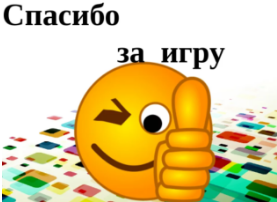